In [ ]:
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
from pandas import Series             # function Series seperti aray 1 dimensi (dengan axis sebagai index) untuk menyimpan berbagai
import matplotlib.pyplot as plt       #Basic Plot di Python                                      #tipe data, seperti integer, string, float, python objects, etc.
import seaborn as sns

from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif, 
                                      # (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data.
import statsmodels.tsa.api as smt     # digunakan untuk mengakses Time-series models dan methods pd librari statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt  # mengakses 3 modul holt-winters di modul time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose #mengakses modul seasonal decompose pada modul time series analysis
from statsmodels.tsa.stattools import adfuller # mengakses function Augmented Dickey-Fuller unit root test. 
from statsmodels.tsa.arima_model import ARIMA  # mengakses function ARIMA
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

from datetime import datetime         
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop. 
from scipy import stats  
                                   # Struktur data seperrti ini juga dikenal sebagai iterables
import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/order_items.csv")
df.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,59347,41038,33153,13606,160256,Shipped,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,2.5
1,101072,69979,56200,13606,272958,Shipped,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,2.5
2,63687,44006,35515,13606,171991,Complete,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,2.5
3,16338,11275,9230,13606,44149,Cancelled,2022-05-31 08:55:48.353609+00:00,NaN,NaN,NaN,2.5
4,85756,59418,47846,13606,231665,Cancelled,2022-05-22 11:36:45+00:00,NaN,NaN,NaN,2.5


In [ ]:
dff = pd.read_csv("/content/products.csv")
dff.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,27569,92.652563,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.410004,Men,B23C5765E165D83AA924FA8F13C05F25,1
1,27445,24.719661,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.990002,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1
2,27457,15.897600,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.600000,Men,8F831227B0EB6C6D09A0555531365933,1
3,27466,17.850000,Swim,TYR Sport Men's Swim Short/Resistance Short Sw...,TYR,30.000000,Men,67317D6DCC4CB778AEB9219565F5456B,1
4,27481,29.408001,Swim,TYR Alliance Team Splice Jammer,TYR,45.950001,Men,213C888198806EF1A0E2BBF2F4855C6C,1


In [ ]:
dfff = pd.read_csv("/content/orders.csv")
dfff.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,11,9,Shipped,F,2021-12-11 05:34:00+00:00,NaN,2021-12-12 10:01:00+00:00,NaN,3
1,12,9,Shipped,F,2022-01-18 05:34:00+00:00,NaN,2022-01-19 20:20:00+00:00,NaN,1
2,22,14,Shipped,F,2020-08-18 11:51:00+00:00,NaN,2020-08-20 16:45:00+00:00,NaN,1
3,25,16,Shipped,F,2020-12-16 08:35:00+00:00,NaN,2020-12-17 21:43:00+00:00,NaN,2
4,26,16,Shipped,F,2020-09-07 08:35:00+00:00,NaN,2020-09-10 00:15:00+00:00,NaN,1


In [ ]:
df1=pd.concat([pd.merge(df, dff,
                        left_on=['product_id'],
                        right_on=['id'], how='inner')])
df1.head()

,id_x,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,id_y,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,59347,41038,33153,13606,160256,Shipped,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3
1,101072,69979,56200,13606,272958,Shipped,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3
2,63687,44006,35515,13606,171991,Complete,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3
3,16338,11275,9230,13606,44149,Cancelled,2022-05-31 08:55:48.353609+00:00,NaN,NaN,NaN,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3
4,85756,59418,47846,13606,231665,Cancelled,2022-05-22 11:36:45+00:00,NaN,NaN,NaN,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3


In [ ]:
df2=pd.concat([pd.merge(df1, dfff,
                        on=['order_id','user_id','status','shipped_at','delivered_at','returned_at'], how='inner')])
df2.head()

,id_x,order_id,user_id,product_id,inventory_item_id,status,created_at_x,shipped_at,delivered_at,returned_at,...,category,name,brand,retail_price,department,sku,distribution_center_id,gender,created_at_y,num_of_item
0,59347,41038,33153,13606,160256,Shipped,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,...,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.50,Women,4ACBEDBE977480D19B7B682D4878CAE2,3,F,2020-01-05 08:18:00+00:00,1
1,101072,69979,56200,13606,272958,Shipped,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,...,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.50,Women,4ACBEDBE977480D19B7B682D4878CAE2,3,F,2022-05-17 09:57:00+00:00,1
2,63687,44006,35515,13606,171991,Complete,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,...,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.50,Women,4ACBEDBE977480D19B7B682D4878CAE2,3,F,2021-01-19 04:42:00+00:00,3
3,63688,44006,35515,9347,171995,Complete,2021-01-23 04:09:56+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,...,Socks & Hosiery,HUE Women's Ultra Smooth Sock,HUE,6.50,Women,71EE911DD06428A96C143A0B135041A4,2,F,2021-01-19 04:42:00+00:00,3
4,63686,44006,35515,12217,171987,Complete,2021-01-20 04:26:19+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,...,Intimates,Set: Mini Heart Bra and Sexy Lace Bottom Panty,Kiss,19.99,Women,2C5201A7391FEDBC40C3CC6AA057A029,1,F,2021-01-19 04:42:00+00:00,3


In [ ]:
df2['profit'] = (df2.sale_price) - (df2.cost)

In [ ]:
df2['profit']

0         1.39250
1         1.39250
2         1.39250
3         3.82850
4         8.61569
           ...   
180503    3.64412
180504    3.64412
180505    4.82776
180506    4.82776
180507    5.44028
Name: profit, Length: 180508, dtype: float64

In [ ]:
df3 = df2[(df2['status'] == 'Shipped' ) | (df2 ['status'] == 'Complete') | (df2 ['status'] == 'Processing')]

In [ ]:
df3.shape

(135975, 24)

In [ ]:
df3.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135975 entries, 0 to 180507
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id_x                    135975 non-null  int64  
 1   order_id                135975 non-null  int64  
 2   user_id                 135975 non-null  int64  
 3   product_id              135975 non-null  int64  
 4   inventory_item_id       135975 non-null  int64  
 5   status                  135975 non-null  object 
 6   created_at_x            135975 non-null  object 
 7   shipped_at              99750 non-null   object 
 8   delivered_at            45283 non-null   object 
 9   returned_at             0 non-null       object 
 10  sale_price              135975 non-null  float64
 11  id_y                    135975 non-null  int64  
 12  cost                    135975 non-null  float64
 13  category                135975 non-null  object 
 14  name                

In [ ]:
df3.isnull().sum()

id_x                           0
order_id                       0
user_id                        0
product_id                     0
inventory_item_id              0
status                         0
created_at_x                   0
shipped_at                 36225
delivered_at               90692
returned_at               135975
sale_price                     0
id_y                           0
cost                           0
category                       0
name                           6
brand                        108
retail_price                   0
department                     0
sku                            0
distribution_center_id         0
gender                         0
created_at_y                   0
num_of_item                    0
profit                         0
dtype: int64

In [ ]:
print (df3.dtypes)

id_x                        int64
order_id                    int64
user_id                     int64
product_id                  int64
inventory_item_id           int64
status                     object
created_at_x               object
shipped_at                 object
delivered_at               object
returned_at                object
sale_price                float64
id_y                        int64
cost                      float64
category                   object
name                       object
brand                      object
retail_price              float64
department                 object
sku                        object
distribution_center_id      int64
gender                     object
created_at_y               object
num_of_item                 int64
profit                    float64
dtype: object


In [ ]:
df3.describe()

,id_x,order_id,user_id,product_id,inventory_item_id,sale_price,id_y,cost,retail_price,distribution_center_id,num_of_item,profit
count,135975.000000,135975.000000,135975.000000,135975.000000,135975.000000,135975.000000,135975.000000,135975.000000,135975.000000,135975.000000,135975.000000,135975.000000
mean,90239.226821,62397.821732,50163.014186,15306.418018,243681.493716,59.802683,15306.418018,28.760988,59.802683,4.989763,1.895562,31.041695
std,52043.530221,35947.284014,28804.077202,8405.474413,140536.244559,65.830883,8405.474413,30.675732,65.830883,2.898887,1.061898,36.147715
min,1.000000,1.000000,1.000000,1.000000,2.000000,0.020000,1.000000,0.008300,0.020000,1.000000,1.000000,0.011700
25%,45334.500000,31390.000000,25373.000000,8084.500000,122425.000000,24.900000,8084.500000,11.399850,24.900000,2.000000,1.000000,11.773800
50%,90208.000000,62491.000000,50257.000000,16054.000000,243707.000000,39.990002,16054.000000,19.965790,39.990002,5.000000,2.000000,20.328000
75%,135244.500000,93546.500000,75078.500000,22560.000000,365166.000000,69.949997,22560.000000,34.702711,69.949997,8.000000,2.000000,36.234734
max,180508.000000,124512.000000,100000.000000,29120.000000,487394.000000,999.000000,29120.000000,557.151002,999.000000,10.000000,4.000000,594.404999


In [ ]:
data_sepal = df3[['sale_price']]

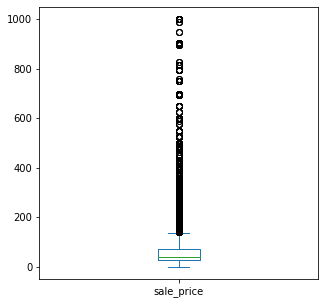

In [ ]:
data_sepal.plot(kind='box', figsize=(5,5))
plt.show()

In [ ]:
data_zscore=data_sepal[(np.abs(stats.zscore(data_sepal)) < 3).all(axis=1)]

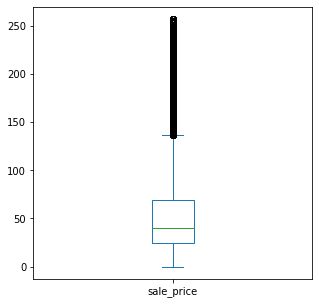

In [ ]:
data_zscore.plot(kind='box', figsize=(5,5))
plt.show()

In [ ]:
#cari Q1, Q3, dan interquartile range
Q1 = data_sepal.quantile(q=.25)
Q3 = data_sepal.quantile(q=.75)
IQR = data_sepal.apply(stats.iqr) #IQR=Q3-Q1 atau bisa menggunakan stats.iqr dari scipy

#ambil nilai antara 1.5*IQR dari Q1 dan Q3 aja
data_iqr = data_sepal[~((data_sepal< (Q1-1.5*IQR)) | (data_sepal > (Q3+1.5*IQR))).any(axis=1)]


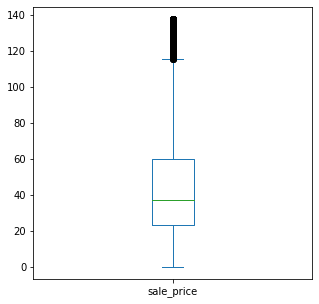

In [ ]:
data_iqr.plot(kind='box', figsize=(5,5))
plt.show()

In [ ]:
df3['created_at_x'] = pd.to_datetime(df3['created_at_x'], format="%Y-%m-%d %H:%M:%S")
salet = df3.groupby(df3.created_at_x.dt.strftime('%Y-%m'))['sale_price'].sum()
salet

created_at_x
2019-01    1.365300e+03
2019-02    4.504070e+03
2019-03    1.074789e+04
2019-04    1.720704e+04
2019-05    2.590251e+04
2019-06    2.470059e+04
2019-07    3.315537e+04
2019-08    3.567510e+04
2019-09    4.423482e+04
2019-10    4.974412e+04
2019-11    5.352239e+04
2019-12    6.257368e+04
2020-01    7.301217e+04
2020-02    7.139731e+04
2020-03    8.982717e+04
2020-04    9.283061e+04
2020-05    9.838593e+04
2020-06    1.037890e+05
2020-07    1.119619e+05
2020-08    1.252592e+05
2020-09    1.227940e+05
2020-10    1.474556e+05
2020-11    1.545529e+05
2020-12    1.671105e+05
2021-01    1.802928e+05
2021-02    1.807866e+05
2021-03    1.987171e+05
2021-04    2.083005e+05
2021-05    2.368721e+05
2021-06    2.448798e+05
2021-07    2.567723e+05
2021-08    2.951051e+05
2021-09    2.914967e+05
2021-10    3.468022e+05
2021-11    3.590785e+05
2021-12    3.962471e+05
2022-01    4.311491e+05
2022-02    4.295789e+05
2022-03    5.547782e+05
2022-04    6.309648e+05
2022-05    1.005628e+06
202

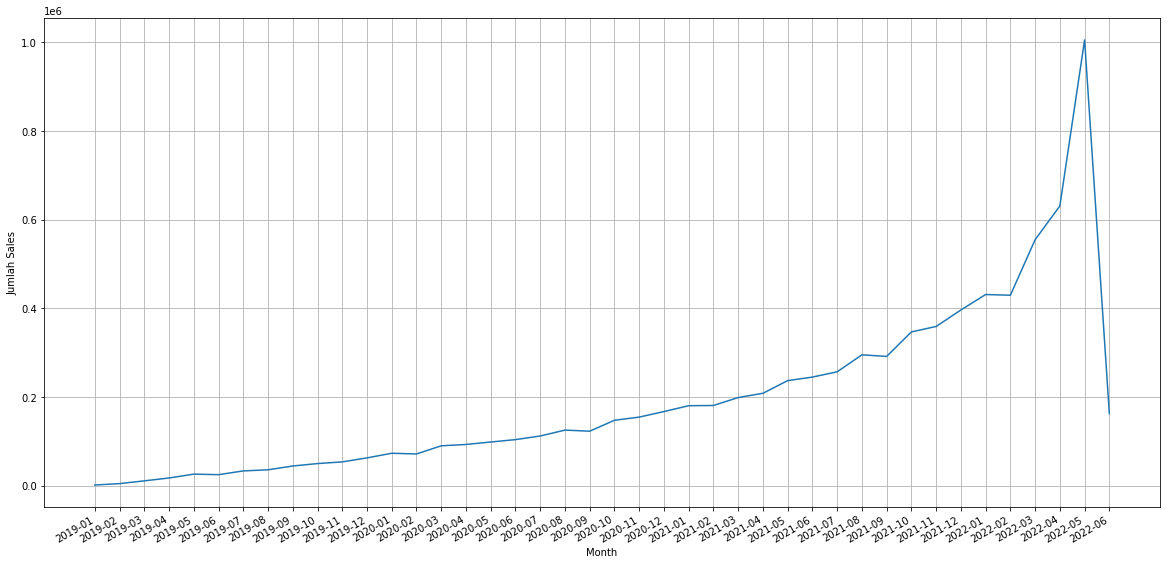

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("Month")
plty.ylabel("Jumlah Sales")

# half_year_locator = mdates.MonthLocator(interval = 10)
# year_month_formatter = mdates.DateFormatter('%Y-%m')

# ax.xaxis.set_major_locator(half_year_locator)
# ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(salet)
fig.autofmt_xdate()
plty.grid()
plty.show()

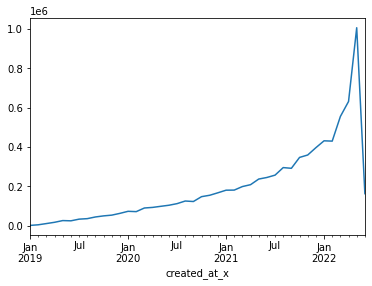

In [ ]:
df3['created_at_x'] = pd.to_datetime(df3['created_at_x'], format="%Y-%m-%d %H:%M:%S")
sale = df3.groupby(df3.created_at_x.dt.to_period('M'))['sale_price'].sum()
sale.plot()

In [ ]:
df3['created_at_x'] = pd.to_datetime(df3['created_at_x'], format="%Y-%m-%d %H:%M:%S")
item = df3.groupby(df3.created_at_x.dt.strftime('%Y-%m'))['num_of_item'].sum()
item

created_at_x
2019-01       59
2019-02      132
2019-03      305
2019-04      625
2019-05      837
2019-06      790
2019-07     1011
2019-08     1319
2019-09     1375
2019-10     1557
2019-11     1670
2019-12     1733
2020-01     2254
2020-02     2282
2020-03     2659
2020-04     2777
2020-05     3180
2020-06     3306
2020-07     3614
2020-08     4125
2020-09     3887
2020-10     4561
2020-11     4911
2020-12     5072
2021-01     5640
2021-02     5738
2021-03     6481
2021-04     6327
2021-05     7469
2021-06     7989
2021-07     8341
2021-08     9369
2021-09     9239
2021-10    10902
2021-11    11674
2021-12    12552
2022-01    13706
2022-02    13502
2022-03    17371
2022-04    19912
2022-05    30819
2022-06     6677
Name: num_of_item, dtype: int64

In [ ]:
# from google.colab import files

# item.to_frame()
# item.to_csv('item.csv')
# files.download('item.csv')

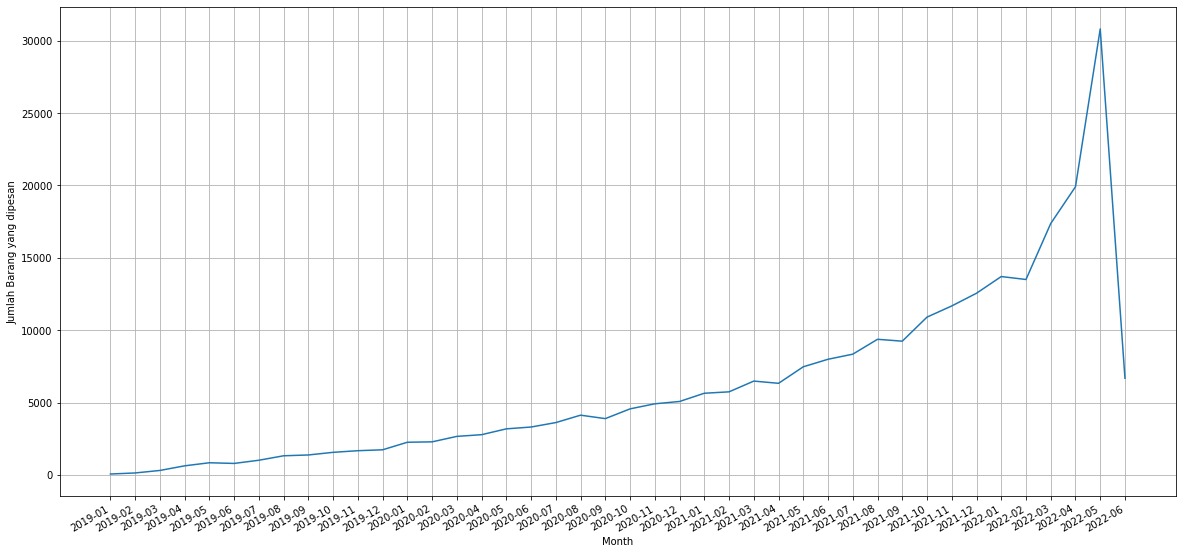

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("Month")
plty.ylabel("Jumlah Barang yang dipesan")

# half_year_locator = mdates.MonthLocator(interval = 10)
# year_month_formatter = mdates.DateFormatter('%Y-%m')

# ax.xaxis.set_major_locator(half_year_locator)
# ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(item)
fig.autofmt_xdate()
plty.grid()
plty.show()

# Time Series 1

In [ ]:
# Seasonal plot 
# from google.colab import files

# sale.to_frame()
# sale.to_csv('sale.csv')
# files.download('sale.csv')


In [ ]:
ss = pd.read_csv("/content/sale.csv")
ss.head()

,created_at_x,sale_price
0,2019-01,1365.299989
1,2019-02,4504.070024
2,2019-03,10747.890019
3,2019-04,17207.040018
4,2019-05,25902.509997


In [ ]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_at_x  42 non-null     object 
 1   sale_price    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [ ]:
ss['created_at_x']=pd.to_datetime(ss['created_at_x'], infer_datetime_format=True)

# Cek tipe data 
print (ss.dtypes)

created_at_x    datetime64[ns]
sale_price             float64
dtype: object


In [ ]:
data=ss.set_index(['created_at_x'])
data.head()

,sale_price
created_at_x,
2019-01-01,1365.299989
2019-02-01,4504.070024
2019-03-01,10747.890019
2019-04-01,17207.040018
2019-05-01,25902.509997


In [ ]:
data.drop(index=data.index[-1],axis=0,inplace=True)

In [ ]:
data['sale_price'] = round(data.sale_price,1)
data['sale_price'] = (data.sale_price)/1000

In [ ]:
data.head()

,sale_price
created_at_x,
2019-01-01,1.3653
2019-02-01,4.5041
2019-03-01,10.7479
2019-04-01,17.2070
2019-05-01,25.9025


In [ ]:
# Summary statistics pada variabel '#Passengers'
print (data.describe().T)
print ('---------')

# Pembulatan decimal 2 angka di belakang koma
print(data.describe().T.round(2))

            count        mean         std     min      25%       50%  \
sale_price   41.0  194.369734  201.663297  1.3653  53.5224  125.2592   

                 75%        max  
sale_price  256.7723  1005.6281  
---------
            count    mean     std   min    25%     50%     75%      max
sale_price   41.0  194.37  201.66  1.37  53.52  125.26  256.77  1005.63


In [ ]:
data['sale_price']

created_at_x
2019-01-01       1.3653
2019-02-01       4.5041
2019-03-01      10.7479
2019-04-01      17.2070
2019-05-01      25.9025
2019-06-01      24.7006
2019-07-01      33.1554
2019-08-01      35.6751
2019-09-01      44.2348
2019-10-01      49.7441
2019-11-01      53.5224
2019-12-01      62.5737
2020-01-01      73.0122
2020-02-01      71.3973
2020-03-01      89.8272
2020-04-01      92.8306
2020-05-01      98.3859
2020-06-01     103.7890
2020-07-01     111.9619
2020-08-01     125.2592
2020-09-01     122.7940
2020-10-01     147.4556
2020-11-01     154.5529
2020-12-01     167.1105
2021-01-01     180.2928
2021-02-01     180.7866
2021-03-01     198.7171
2021-04-01     208.3005
2021-05-01     236.8721
2021-06-01     244.8798
2021-07-01     256.7723
2021-08-01     295.1051
2021-09-01     291.4967
2021-10-01     346.8022
2021-11-01     359.0785
2021-12-01     396.2471
2022-01-01     431.1491
2022-02-01     429.5789
2022-03-01     554.7782
2022-04-01     630.9648
2022-05-01    1005.6281
Nam

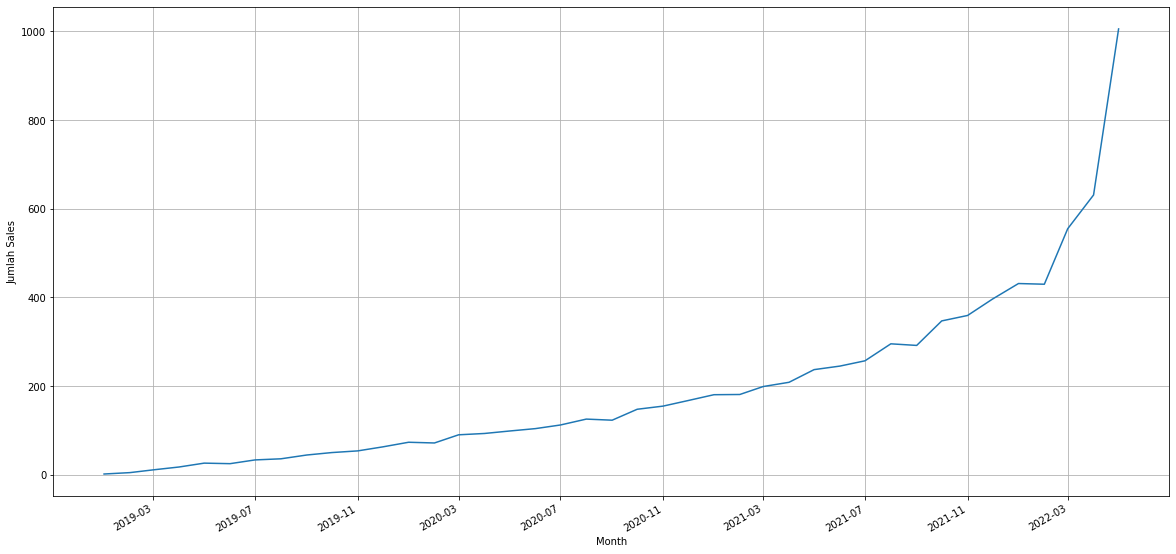

In [ ]:
# Time Series plot

import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("Month")
plty.ylabel("Jumlah Sales")

half_year_locator = mdates.MonthLocator(interval = 4)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(data)
fig.autofmt_xdate()
plty.grid()
plty.show()


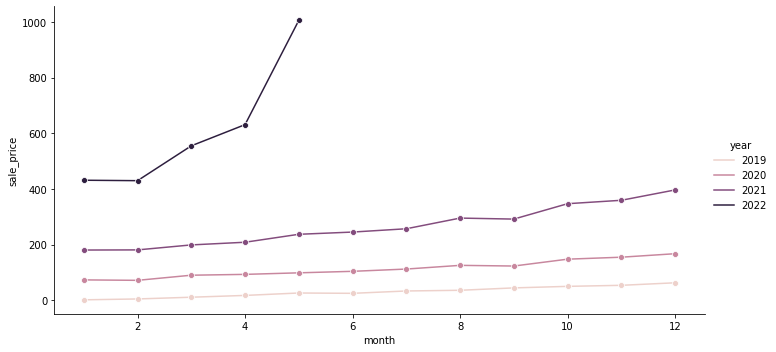

In [ ]:
# Seasonal plot 

data2 = data.reset_index()
data2['year'] = pd.DatetimeIndex(data2['created_at_x']).year
data2['month'] = pd.DatetimeIndex(data2['created_at_x']).month

# parameter hue digunakan untuk menampilkan multiple line chart berdasarkan tahun ('year')
sns.relplot (kind = 'line', data = data2, x = 'month', y = 'sale_price', hue = 'year', aspect = 2, marker='o' )

In [ ]:
# rolling dengan interval window sebesar 12 bulan dan hitung rata-rata
rolmean=data.rolling(window=12).mean()  

# rolling dengan interval window sebesar 12 bulan dan hitung st. deviasi
rolstd=data.rolling(window=12).std() 

# Tampilkan 15 baris pertama dari hasil rolling mean
print('15 baris pertama rolling mean: ')
print(rolmean.head(15))                
print ('')

# Tampilkan 15 baris pertama dari hasil rolling st. deviasi
print('15 baris pertama std. deviasi: ')
print(rolstd.head(15))     

15 baris pertama rolling mean: 
              sale_price
created_at_x            
2019-01-01           NaN
2019-02-01           NaN
2019-03-01           NaN
2019-04-01           NaN
2019-05-01           NaN
2019-06-01           NaN
2019-07-01           NaN
2019-08-01           NaN
2019-09-01           NaN
2019-10-01           NaN
2019-11-01           NaN
2019-12-01     30.277742
2020-01-01     36.248317
2020-02-01     41.822750
2020-03-01     48.412692

15 baris pertama std. deviasi: 
              sale_price
created_at_x            
2019-01-01           NaN
2019-02-01           NaN
2019-03-01           NaN
2019-04-01           NaN
2019-05-01           NaN
2019-06-01           NaN
2019-07-01           NaN
2019-08-01           NaN
2019-09-01           NaN
2019-10-01           NaN
2019-11-01           NaN
2019-12-01     19.765006
2020-01-01     21.018913
2020-02-01     20.702669
2020-03-01     22.426159


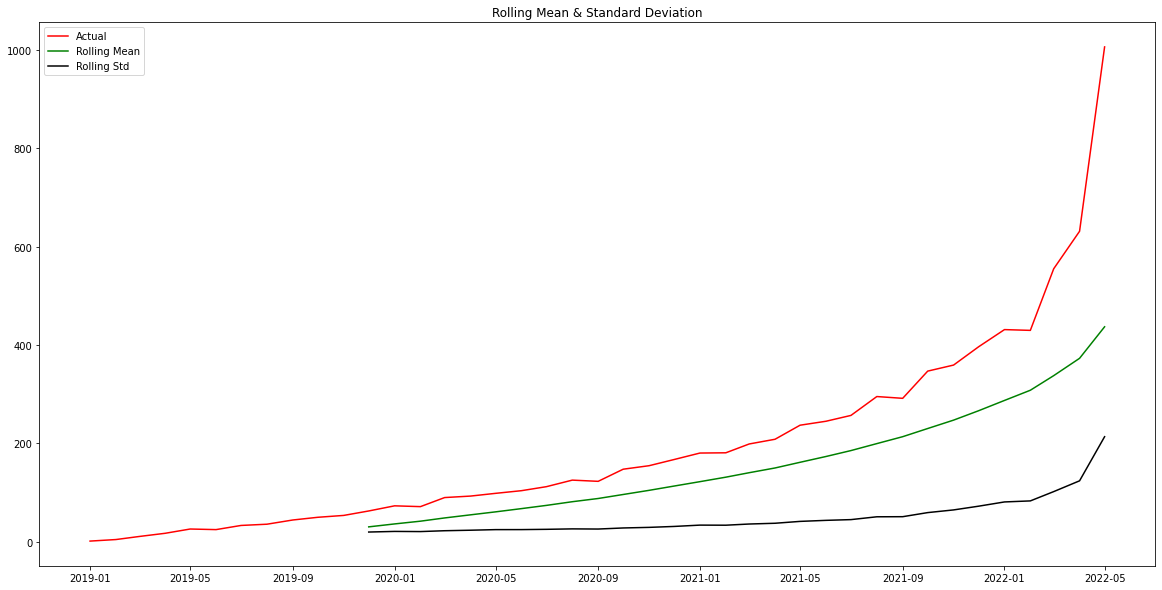

In [ ]:
plt.figure(figsize=(20,10))

# buat multiple line chart berdasarkan warna dan label
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')

# tampilkan legend, judul dari chart, dan panggil function untuk menampilkan chart
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
print('Dickey-Fuller Test: ')
dftest=adfuller(data['sale_price'], autolag='AIC')
dftest


Dickey-Fuller Test: 


(-2.6128597177063786,
 0.09036844608868994,
 7,
 33,
 {'1%': -3.6461350877925254,
  '10%': -2.6159676124885216,
  '5%': -2.954126991123355},
 275.38232673957725)

In [ ]:
# Supaya hasil uji lebih nyaman dibaca, maka kita buat series berdasarkan index 
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])

# Gunakan for loop untuk menaruh value dari dictionary dengan function items()
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('Dickey-Fuller Test: ')
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic          -2.612860
p-value                  0.090368
Lags Used                7.000000
No. of Obs              33.000000
Critical Value (1%)     -3.646135
Critical Value (5%)     -2.954127
Critical Value (10%)    -2.615968
dtype: float64


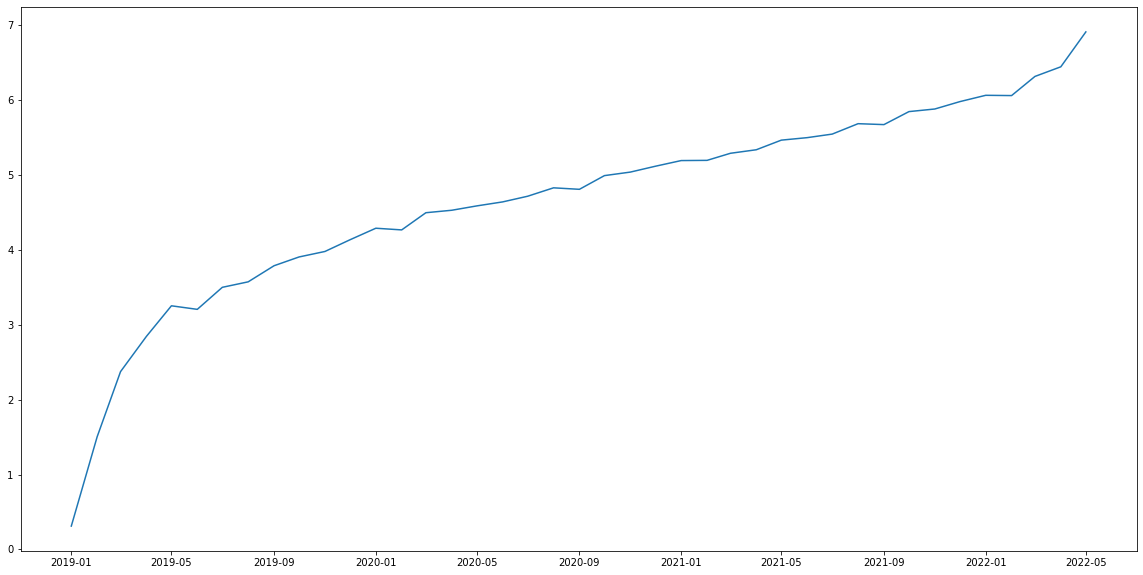

In [ ]:
plt.figure(figsize=(20,10))
data_log=np.log(data) 
plt.plot(data_log)

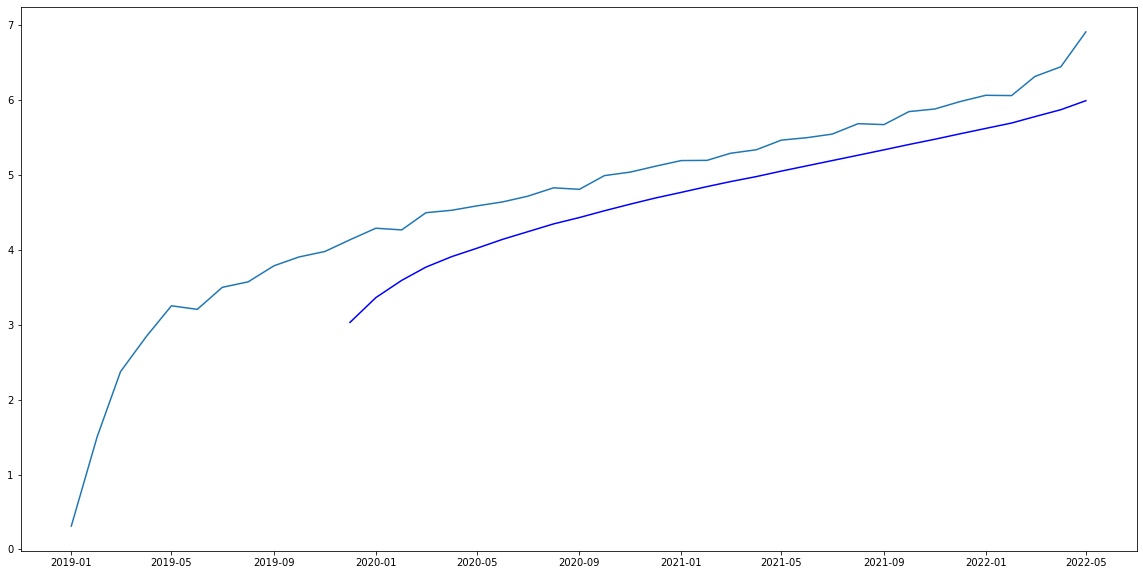

In [ ]:
plt.figure(figsize=(20,10))

MAvg=data_log.rolling(window=12).mean() 
MStd=data_log.rolling(window=12).std()

plt.plot(data_log)
plt.plot(MAvg, color='blue')
#plt.plot(MStd, color='red')

In [ ]:
# Hitung difference dari data_log dengan MAvg
data_log_diff=data_log-MAvg

# Tampilkan 12 baris teratas dari data_log_diff
data_log_diff.head(12)

,sale_price
created_at_x,
2019-01-01,NaN
2019-02-01,NaN
2019-03-01,NaN
2019-04-01,NaN
2019-05-01,NaN
2019-06-01,NaN
2019-07-01,NaN
2019-08-01,NaN
2019-09-01,NaN


In [ ]:
data_log_diff=data_log_diff.dropna() 
data_log_diff.head()

,sale_price
created_at_x,
2019-12-01,1.104173
2020-01-01,0.926850
2020-02-01,0.674211
2020-03-01,0.726907
2020-04-01,0.619341


In [ ]:
# Buat function stationarity untuk menampilkan multiple line chart dari actual, rolling mean, dan rolling std.deviasi
# yang juga berisikan hasil tes dari Dickey-Fuller

def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['sale_price'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

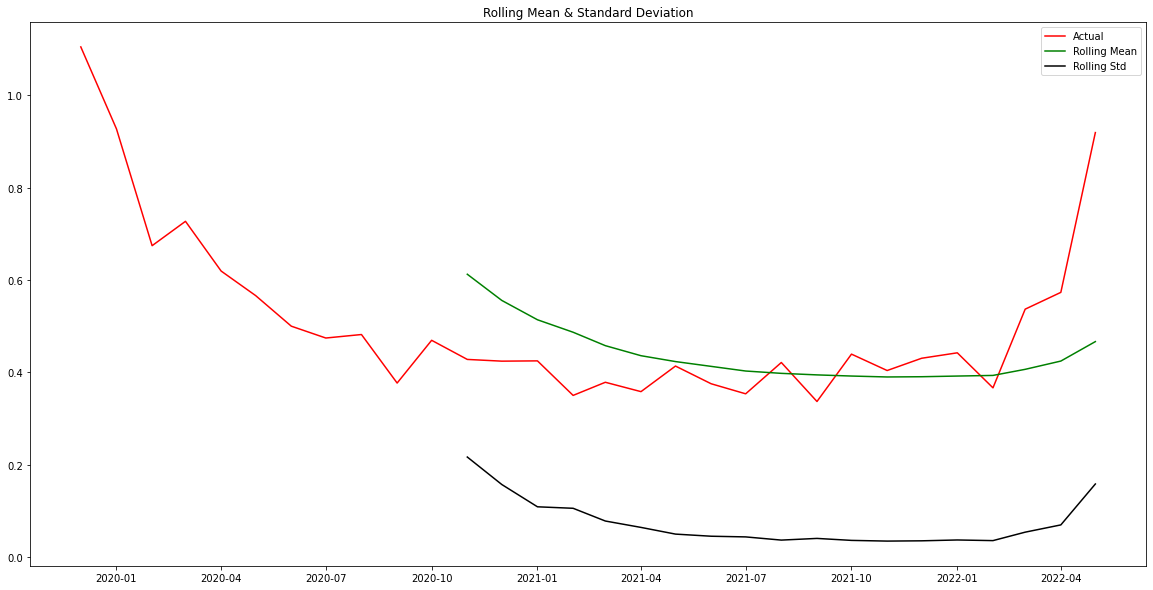

Dickey-Fuller Test: 
Test Statistic           3.417859
p-value                  1.000000
Lags Used                7.000000
No. of Obs              22.000000
Critical Value (1%)     -3.769733
Critical Value (5%)     -3.005426
Critical Value (10%)    -2.642501
dtype: float64


In [ ]:
# panggil function dan terapkan pada data_log_diff
stationarity(data_log_diff)

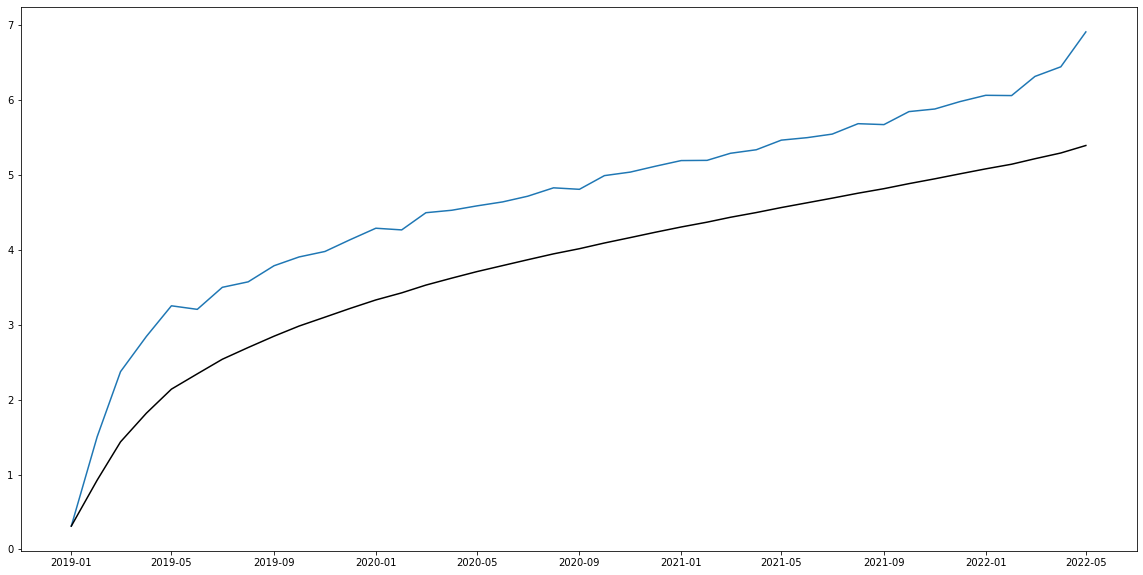

In [ ]:
# Visualisasikan ke dalam bentuk chart 
plt.figure(figsize=(20,10))

# Terapkan function ewm pada data_log melalui variable exp_data
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean() 

plt.plot(data_log)
plt.plot(exp_data, color='black')

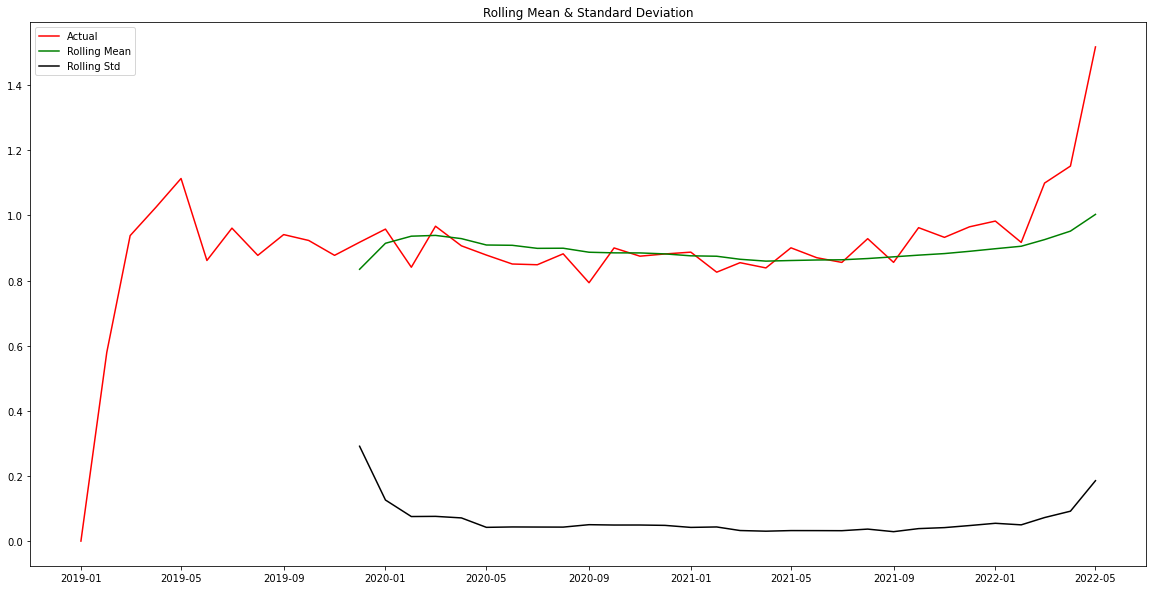

Dickey-Fuller Test: 
Test Statistic          -1.790290
p-value                  0.385293
Lags Used                1.000000
No. of Obs              39.000000
Critical Value (1%)     -3.610400
Critical Value (5%)     -2.939109
Critical Value (10%)    -2.608063
dtype: float64


In [ ]:
# Hitung difference antara data_log dengan exp_data
exp_data_diff=data_log-exp_data

# Panggil function stationarity dan terapkan pada exp_data_diff
stationarity(exp_data_diff)

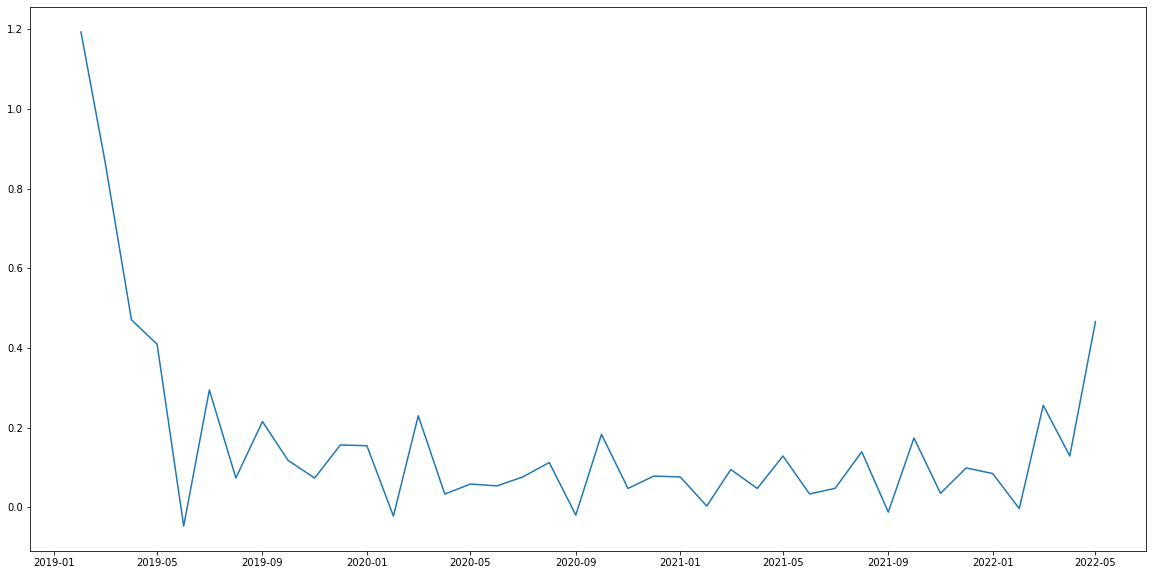

In [ ]:
# Buat format ukuran chart
plt.figure(figsize=(20,10))

# Terapkan shift terhadap data yang telah diterapkan transformasi log di cell sebelumnya
data_shift=data_log-data_log.shift() 

# Tampilkan chart
plt.plot(data_shift)

In [ ]:
# Check missing value
data_shift.isna().sum()

sale_price    1
dtype: int64

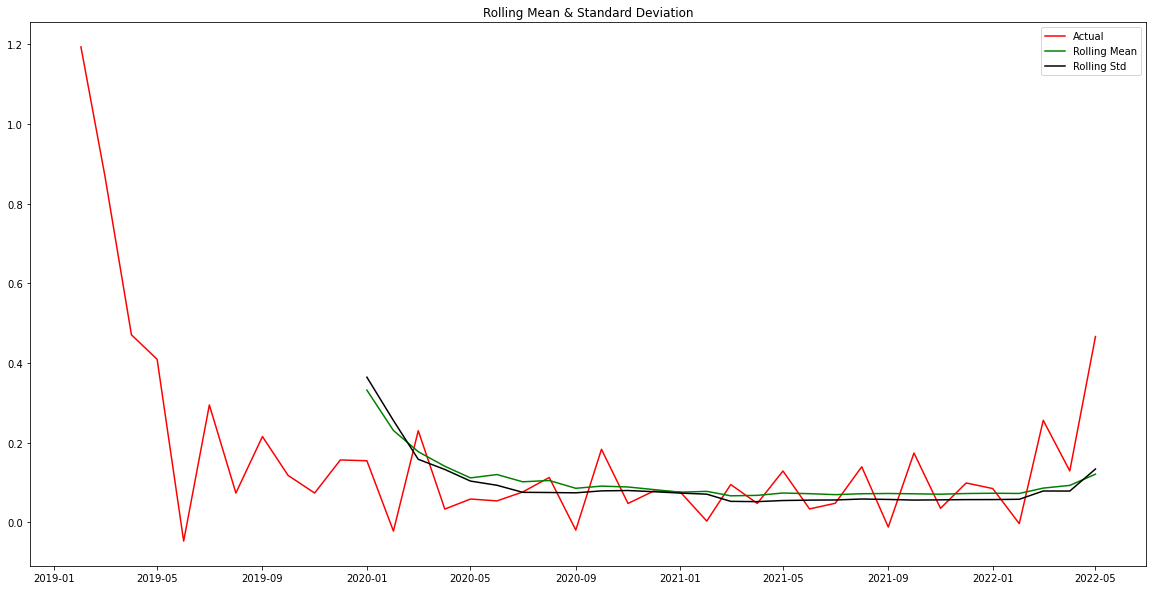

Dickey-Fuller Test: 
Test Statistic          -4.810972
p-value                  0.000052
Lags Used                2.000000
No. of Obs              37.000000
Critical Value (1%)     -3.620918
Critical Value (5%)     -2.943539
Critical Value (10%)    -2.610400
dtype: float64


In [ ]:
# Lakukan dropna 
data_shift=data_shift.dropna()

# Panggil function stationarity dan terapkan pada data_shift yang sudah dibersihkan dari NA value
stationarity(data_shift)

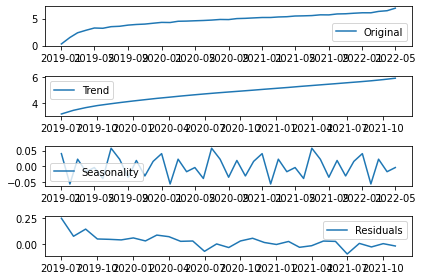

In [ ]:
# panggil function seasonal_decompose () dari statsmodels.tsa yang diterapkan di variabel data_log
decomp=seasonal_decompose(data_log)

# buat variabel trend, seasonal, residual yang sudah diterapkan
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

# Format gambar 
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
# Tampilkan nilai dari tiap kategori dari 24 baris teratas
print("Trend \n",trend.head(24), '\n') # \n untuk menambahkan baris di akhir
print("Seasonal \n",seasonal.head(24), '\n')
print("Residual \n",residual.head(24), '\n')

Trend 
               sale_price
created_at_x            
2019-01-01           NaN
2019-02-01           NaN
2019-03-01           NaN
2019-04-01           NaN
2019-05-01           NaN
2019-06-01           NaN
2019-07-01      3.197974
2019-08-01      3.478913
2019-09-01      3.682515
2019-10-01      3.841208
2019-11-01      3.967042
2019-12-01      4.082462
2020-01-01      4.192983
2020-02-01      4.296020
2020-03-01      4.390892
2020-04-01      4.478710
2020-05-01      4.568171
2020-06-01      4.653285
2020-07-01      4.731880
2020-08-01      4.808255
2020-09-01      4.880049
2020-10-01      4.946807
2020-11-01      5.017092
2020-12-01      5.089468 

Seasonal 
               sale_price
created_at_x            
2019-01-01      0.040656
2019-02-01     -0.055823
2019-03-01      0.022973
2019-04-01     -0.016770
2019-05-01     -0.003551
2019-06-01     -0.038303
2019-07-01      0.057801
2019-08-01      0.022772
2019-09-01     -0.034348
2019-10-01      0.018891
2019-11-01     -0.030287
2019

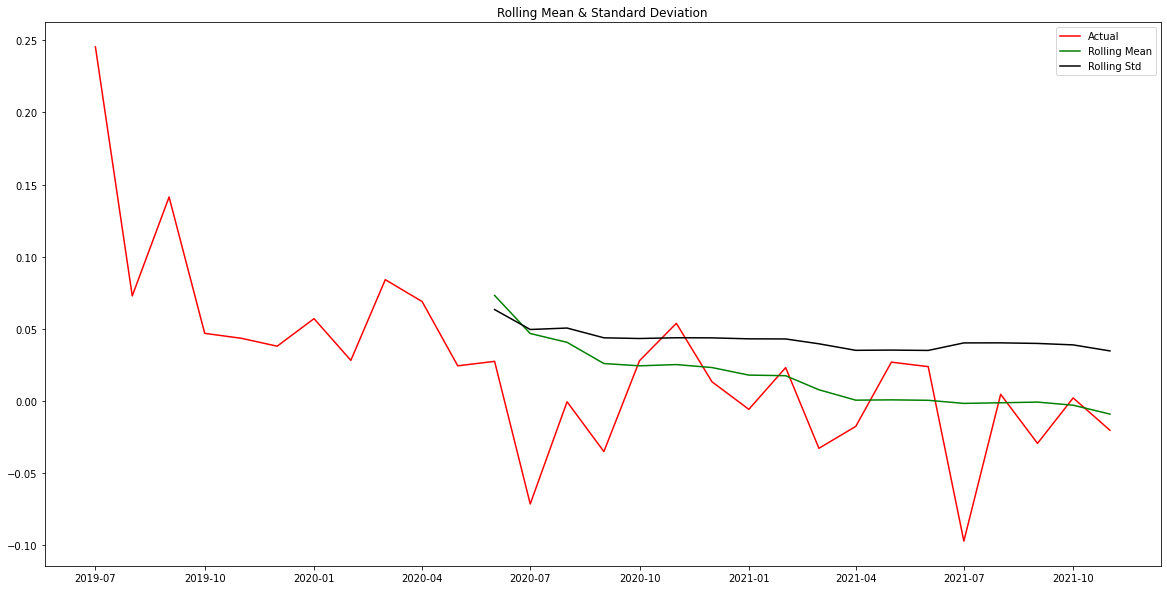

Dickey-Fuller Test: 
Test Statistic          -5.082560
p-value                  0.000015
Lags Used                0.000000
No. of Obs              28.000000
Critical Value (1%)     -3.688926
Critical Value (5%)     -2.971989
Critical Value (10%)    -2.625296
dtype: float64


In [ ]:
# assign variable baru decomp_data dengan variabel residual di atas
decomp_data=residual

# terapkan function dropna
decomp_data=decomp_data.dropna()

# Panggil function stationarity dan terapkan pada decomp data yang tanpa NA value
stationarity(decomp_data)

Text(0.5, 1.0, 'Partial Autocorrelation Function / PACF')

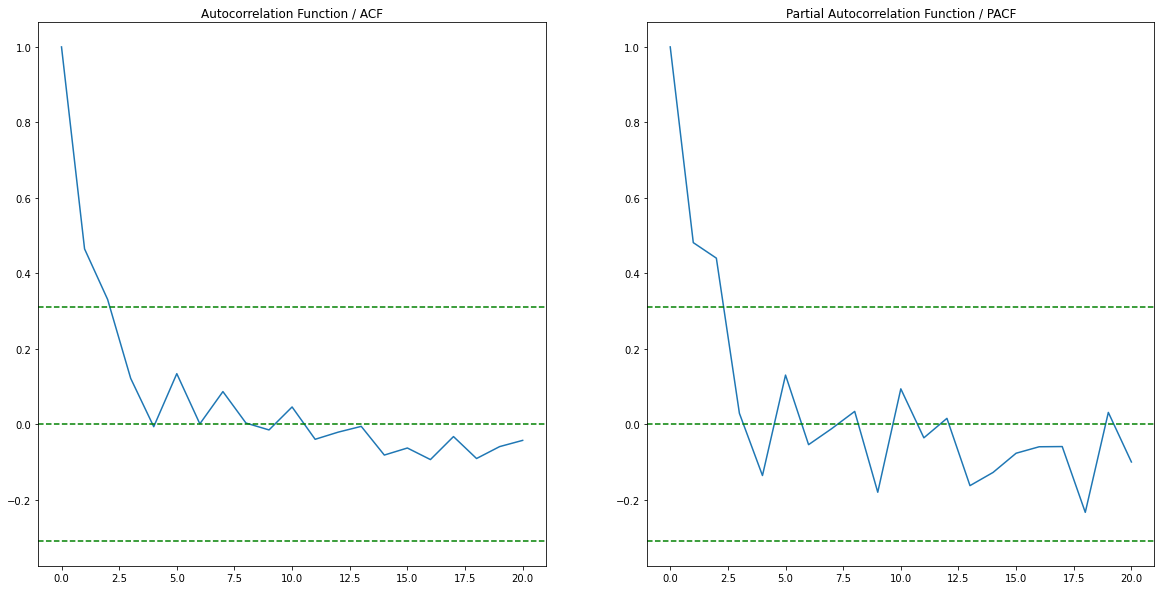

In [ ]:
# dari module time series analysis, import function acf dan pacf
# ACF = Auto Correlation Function
# PACF = Partial Auto Correlation Function
from statsmodels.tsa.stattools import acf, pacf 

# terapkan function acf dan pcf pada data_shift yang sudah dibuat
lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

# Format grafik dan visualisasikan ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

# Format grafik dan visualisasikan PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

In [ ]:
train = data[0:int(len(data)*0.80)]   #train data sebesar 80%
test = data[int(len(data)*0.80):]     #test data sebesar 20%

In [ ]:
model_data = ExponentialSmoothing(np.asarray(train['sale_price']),seasonal_periods=12, trend='add',seasonal='mul').fit(optimized=True)

In [ ]:
data_Holt = test.copy() 

In [ ]:
data_Holt['Holt'] = model_data.forecast(len(test['sale_price']))

In [ ]:
data_Holt.tail()

,sale_price,Holt
created_at_x,,
2022-01-01,431.1491,325.388915
2022-02-01,429.5789,297.947112
2022-03-01,554.7782,314.843036
2022-04-01,630.9648,317.584448
2022-05-01,1005.6281,347.055956


In [ ]:
#params untuk mengubah data pada variabel model_data menjadi sebuah dictionary
model_data.params 

{'damping_slope': nan,
 'initial_level': 84.8901,
 'initial_seasons': array([0.01608315, 0.05305801, 0.12660958, 0.20269737, 0.30512981,
        0.2909715 , 0.39056851, 0.42025042, 0.52108314, 0.58598235,
        0.63049048, 0.73711422]),
 'initial_slope': 6.910023611111111,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.05263157894736842,
 'smoothing_seasonal': 0.894736842105263,
 'smoothing_slope': 0.05263157894736842,
 'use_boxcox': False}

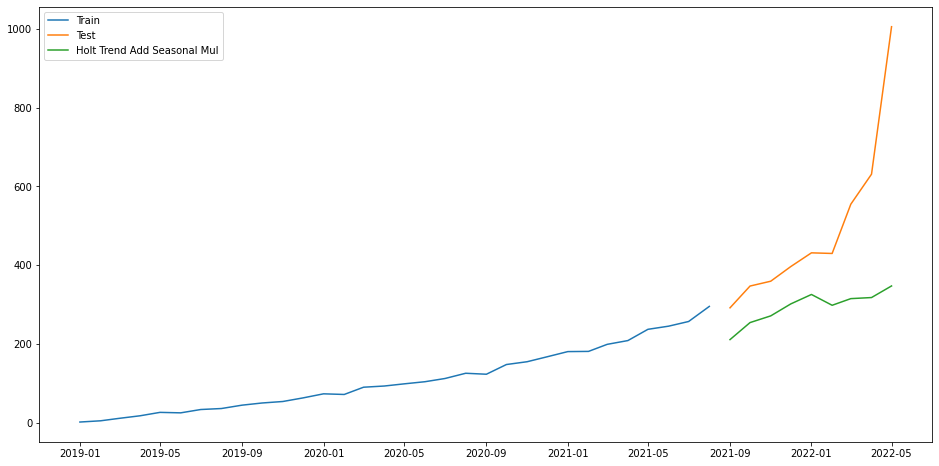

In [ ]:
# visualisasi hasil forecast dari model HoltWinters dengan data aktual
plt.figure(figsize=(16,8))
plt.plot(train['sale_price'], label='Train')
plt.plot(test['sale_price'], label='Test')
plt.plot(data_Holt['Holt'], label='Holt Trend Add Seasonal Mul')
plt.legend(loc=0)

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in list(itertools.product(p, d, q))]

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
train_log = np.log10(train['sale_price'])

In [ ]:
for param in pdq: #Non-Seasonal
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_log,
                                             order = param,
                                             seasonal_order = param_seasonal)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal #Store the best param values : AIC, P, D, Q [Non-S / Seas]
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(1, 0, 0, 10)12 model - AIC:-65.36030887788839


In [ ]:
# tampilkan hasil dari SARIMAX
mod = sm.tsa.statespace.SARIMAX(train_log,
                                order=(0,1,1),
                                seasonal_order=(1,0,1,10),
                                enforce_stationarity=True)

best_results = mod.fit()

print(best_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5787      0.215      2.688      0.007       0.157       1.001
ar.S.L10       0.7457      1.080      0.691      0.490      -1.371       2.862
ma.S.L10      -0.4399      1.444     -0.305      0.761      -3.271       2.391
sigma2         0.0098      0.003      3.077      0.002       0.004       0.016


In [ ]:
# Terapkan function get_prediction() pada best_results
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2040-01-01'), dynamic=True, full_results=True)
pred_dynamic

In [ ]:
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci 

,lower sale_price,upper sale_price
2040-01-01,-5.732807,12.558619


In [ ]:
pred99 = best_results.get_forecast(steps=29, alpha=0.1)
pred99

In [ ]:
# Extract the predicted and true values of our time series
# sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sale_Forecast'] = np.power(10, pred99.predicted_mean)

In [ ]:
testCopy.tail(10)

,sale_price,sale_Forecast
created_at_x,,
2021-09-01,291.4967,316.364521
2021-10-01,346.8022,334.070727
2021-11-01,359.0785,363.588837
2021-12-01,396.2471,364.341281
2022-01-01,431.1491,386.198979
2022-02-01,429.5789,396.859496
2022-03-01,554.7782,423.757042
2022-04-01,630.9648,438.552458
2022-05-01,1005.6281,451.852272


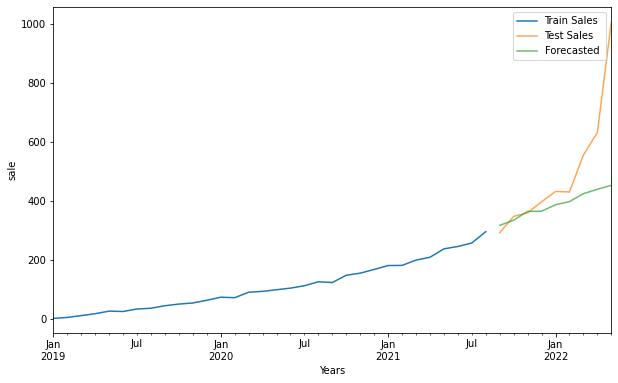

In [ ]:
# visualisasikan dari antara train, test, dan hasil forecast

axis = train['sale_price'].plot(label='Train Sales', figsize=(10, 6))
testCopy['sale_price'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sale_Forecast'].plot(ax=axis, label='Forecasted ', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('sale')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
n_steps = 36
idx = pd.date_range(data.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2022-05-01,316.364521,202.487739,494.284299,202.487739,494.284299
2022-06-01,334.070727,145.124979,769.014759,145.124979,769.014759
2022-07-01,363.588837,122.071279,1082.947959,122.071279,1082.947959
2022-08-01,364.341281,99.400187,1335.455925,99.400187,1335.455925
2022-09-01,386.198979,88.125328,1692.472022,88.125328,1692.472022


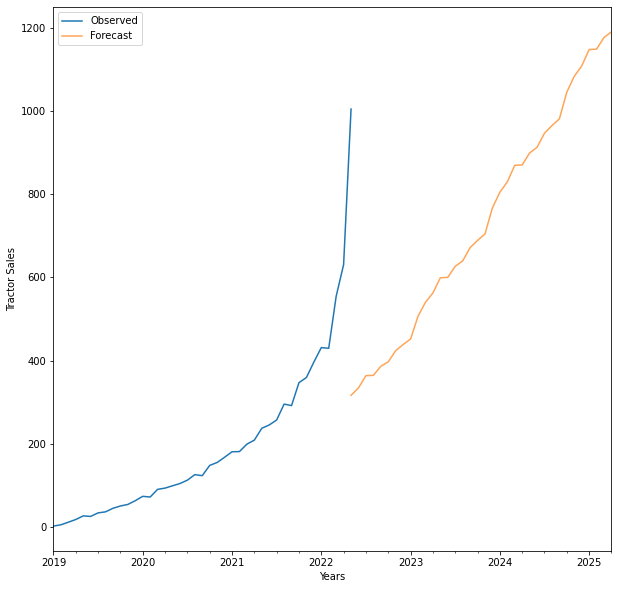

In [ ]:
# plot the forecast along with the confidence band
axis = data['sale_price'].plot(label='Observed', figsize=(10,10))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
# axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

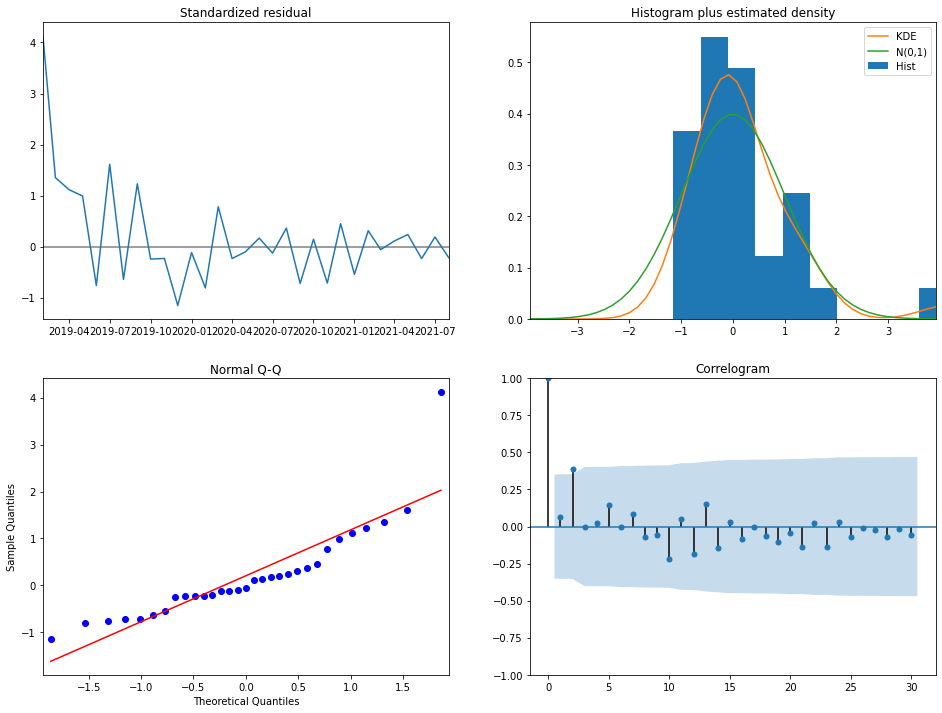

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [ ]:
# Hitung MAE pada model HoltWinters menggunakan function yang dibuat dari awal
def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 

# Hitung MAPE pada model HoltWinters
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MSE dan RMSE pada model HoltWinters
mse = ((test['sale_price'] - data_Holt['Holt']) ** 2).mean()
rmse = np.sqrt(mse)

print('Mean Absolute Error of our forecasts is ', mean_absolute_error(test['sale_price'],data_Holt['Holt']).round(3))
print('Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(test['sale_price'],data_Holt['Holt']).round(2), ' %')
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 3)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

Mean Absolute Error of our forecasts is  200.639
Mean Absolute Percentage Error of our forecasts is  35.17  %
The Mean Squared Error of our forecasts is 72210.206
The Root Mean Squared Error of our forecasts is 268.72


In [ ]:
# Import module metrics dan panggil functionnya
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = test['sale_price']
y_pred = testCopy['sale_Forecast']

print('The Mean Absolute Error of our forecasts is ', mean_absolute_error(y_true, y_pred).round(3))
print ('The Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(y_true, y_pred).round(3), '%')
print ('The Mean Squared Error of our forecasts is ', mean_squared_error(y_true, y_pred).round(3))
print ('The Root Mean Squared Error of our forecasts is ', np.sqrt(mean_squared_error(y_true, y_pred)).round(3))


The Mean Absolute Error of our forecasts is  114.322
The Mean Absolute Percentage Error of our forecasts is  0.165 %
The Mean Squared Error of our forecasts is  40640.735
The Root Mean Squared Error of our forecasts is  201.595


# Time Series 2

In [ ]:
item = pd.read_csv("/content/item.csv")
item.head()

,created_at_x,num_of_item
0,2019-01,59
1,2019-02,132
2,2019-03,305
3,2019-04,625
4,2019-05,837


In [ ]:
item.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   created_at_x  42 non-null     object
 1   num_of_item   42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes


In [ ]:
# Pada kolom Month, ubah tipe data menjadi datetime
item['created_at_x']=pd.to_datetime(item['created_at_x'], infer_datetime_format=True)

# Cek tipe data 
print (item.dtypes)

created_at_x    datetime64[ns]
num_of_item              int64
dtype: object


In [ ]:
item=item.set_index(['created_at_x'])
item.head()

,num_of_item
created_at_x,
2019-01-01,59
2019-02-01,132
2019-03-01,305
2019-04-01,625
2019-05-01,837


In [ ]:
# Summary statistics pada variabel '#Passengers'
print (item.describe().T)
print ('---------')

# Pembulatan decimal 2 angka di belakang koma
print(item.describe().T.round(2))

             count         mean          std   min      25%     50%     75%  \
num_of_item   42.0  6136.880952  6206.672689  59.0  1685.75  4343.0  8253.0   

                 max  
num_of_item  30819.0  
---------
             count     mean      std   min      25%     50%     75%      max
num_of_item   42.0  6136.88  6206.67  59.0  1685.75  4343.0  8253.0  30819.0


In [ ]:
item.drop(index=item.index[-1],axis=0,inplace=True)

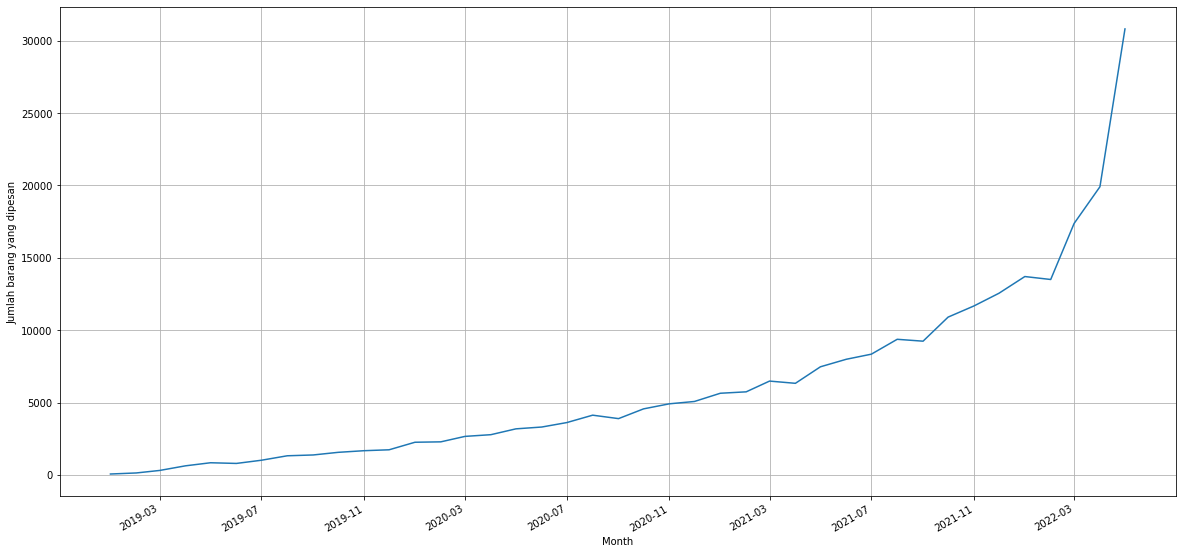

In [ ]:
# Time Series plot

import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("Month")
plty.ylabel("Jumlah barang yang dipesan")

half_year_locator = mdates.MonthLocator(interval = 4)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(item)
fig.autofmt_xdate()
plty.grid()
plty.show()

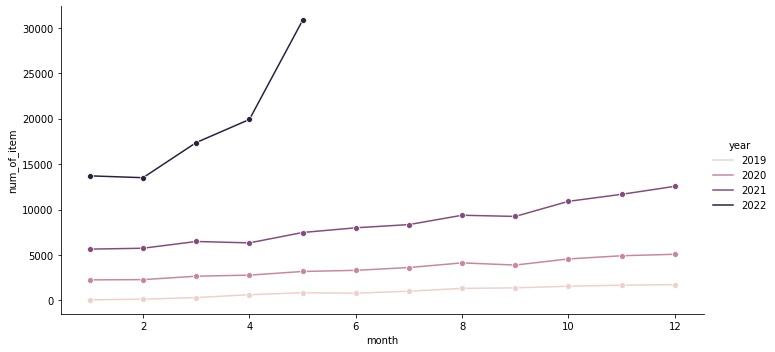

In [ ]:
# Seasonal plot 

data2 = item.reset_index()
data2['year'] = pd.DatetimeIndex(data2['created_at_x']).year
data2['month'] = pd.DatetimeIndex(data2['created_at_x']).month

# parameter hue digunakan untuk menampilkan multiple line chart berdasarkan tahun ('year')
sns.relplot (kind = 'line', data = data2, x = 'month', y = 'num_of_item', hue = 'year', aspect = 2, marker='o' )

In [ ]:
# rolling dengan interval window sebesar 12 bulan dan hitung rata-rata
rolmean=item.rolling(window=12).mean()  

# rolling dengan interval window sebesar 12 bulan dan hitung st. deviasi
rolstd=item.rolling(window=12).std() 

# Tampilkan 15 baris pertama dari hasil rolling mean
print('15 baris pertama rolling mean: ')
print(rolmean.head(15))                
print ('')

# Tampilkan 15 baris pertama dari hasil rolling st. deviasi
print('15 baris pertama std. deviasi: ')
print(rolstd.head(15))     

15 baris pertama rolling mean: 
              num_of_item
created_at_x             
2019-01-01            NaN
2019-02-01            NaN
2019-03-01            NaN
2019-04-01            NaN
2019-05-01            NaN
2019-06-01            NaN
2019-07-01            NaN
2019-08-01            NaN
2019-09-01            NaN
2019-10-01            NaN
2019-11-01            NaN
2019-12-01     951.083333
2020-01-01    1134.000000
2020-02-01    1313.166667
2020-03-01    1509.333333

15 baris pertama std. deviasi: 
              num_of_item
created_at_x             
2019-01-01            NaN
2019-02-01            NaN
2019-03-01            NaN
2019-04-01            NaN
2019-05-01            NaN
2019-06-01            NaN
2019-07-01            NaN
2019-08-01            NaN
2019-09-01            NaN
2019-10-01            NaN
2019-11-01            NaN
2019-12-01     591.104891
2020-01-01     628.398542
2020-02-01     623.219184
2020-03-01     647.057302


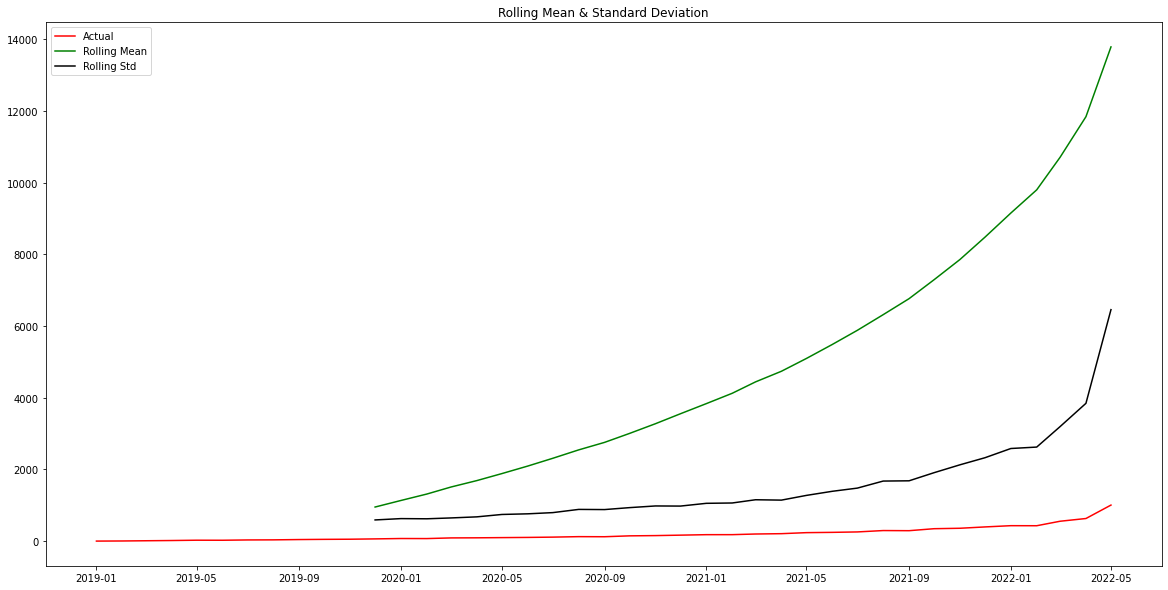

In [ ]:
# atur ukuran chart
plt.figure(figsize=(20,10))

# buat multiple line chart berdasarkan warna dan label
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')

# tampilkan legend, judul dari chart, dan panggil function untuk menampilkan chart
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
print('Dickey-Fuller Test: ')
dftest=adfuller(item['num_of_item'], autolag='AIC')
dftest

Dickey-Fuller Test: 


(-1.991998821972242,
 0.29009231908448097,
 10,
 30,
 {'1%': -3.6699197407407405,
  '10%': -2.621171111111111,
  '5%': -2.9640707407407407},
 485.3913246614646)

In [ ]:
# Supaya hasil uji lebih nyaman dibaca, maka kita buat series berdasarkan index 
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])

# Gunakan for loop untuk menaruh value dari dictionary dengan function items()
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('Dickey-Fuller Test: ')
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic          -1.991999
p-value                  0.290092
Lags Used               10.000000
No. of Obs              30.000000
Critical Value (1%)     -3.669920
Critical Value (5%)     -2.964071
Critical Value (10%)    -2.621171
dtype: float64


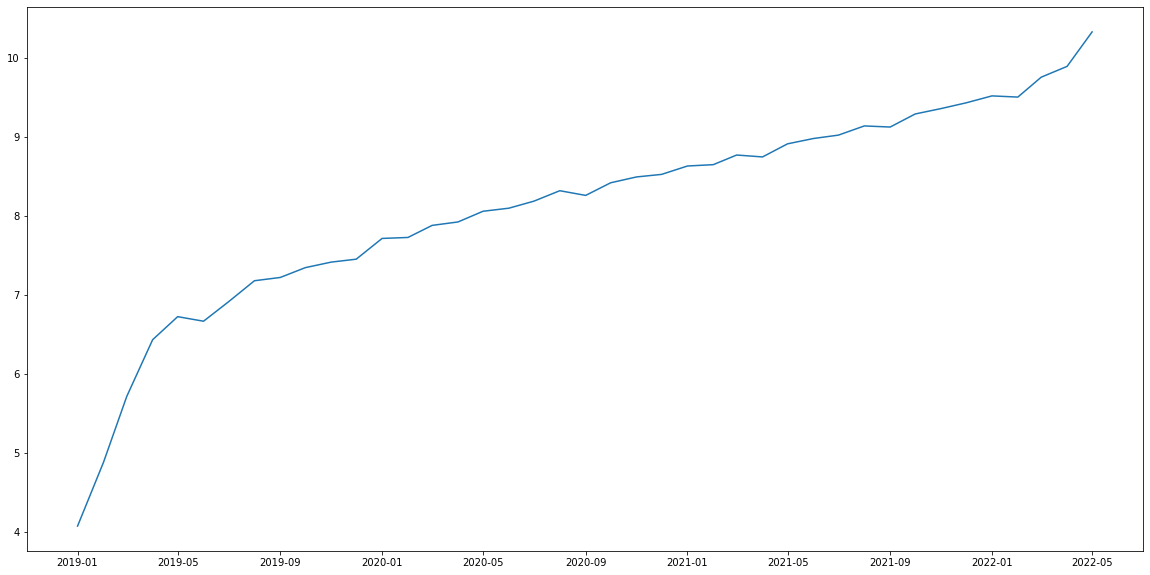

In [ ]:
# Plot dalam bentuk visualisasi line chart dengan menggunakan function numpy np.log
plt.figure(figsize=(20,10))
data_log=np.log(item) 
plt.plot(data_log)

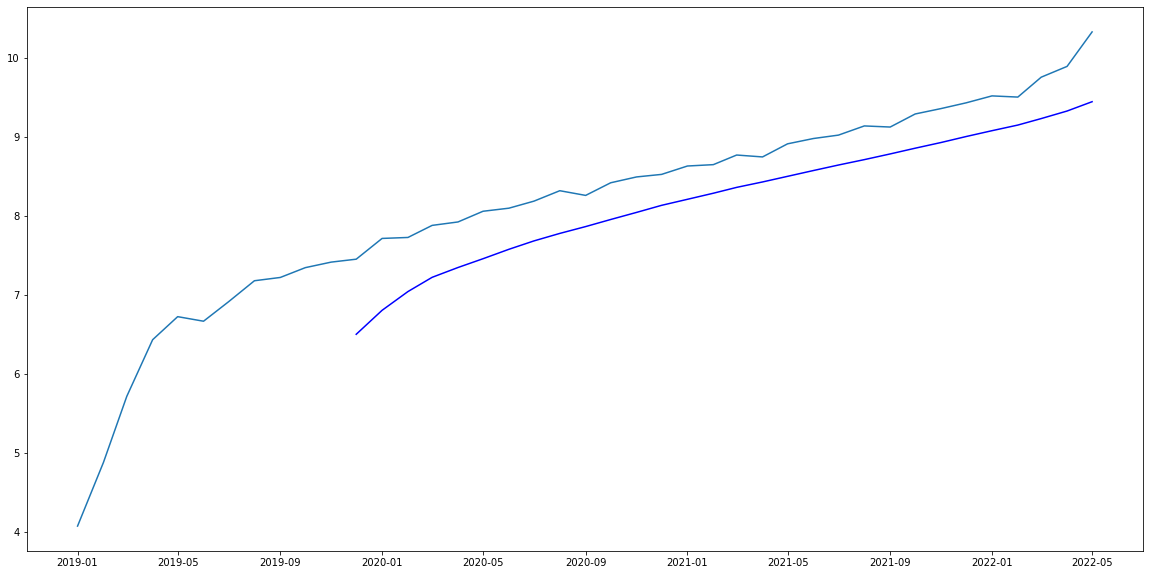

In [ ]:
# Cek secara visual kembali dengan plot data_log dengan rolling window mean dan std. deviation
plt.figure(figsize=(20,10))

MAvg=data_log.rolling(window=12).mean() 
MStd=data_log.rolling(window=12).std()

plt.plot(data_log)
plt.plot(MAvg, color='blue')
#plt.plot(MStd, color='red')

In [ ]:
# Hitung difference dari data_log dengan MAvg
data_log_diff=data_log-MAvg

# Tampilkan 12 baris teratas dari data_log_diff
data_log_diff.head(12)

,num_of_item
created_at_x,
2019-01-01,NaN
2019-02-01,NaN
2019-03-01,NaN
2019-04-01,NaN
2019-05-01,NaN
2019-06-01,NaN
2019-07-01,NaN
2019-08-01,NaN
2019-09-01,NaN


In [ ]:
# Efek dari rolling di atas, maka akan ada value NaN, sehingga kita bisa lakukan dropna()
data_log_diff=data_log_diff.dropna() 
data_log_diff.head()

,num_of_item
created_at_x,
2019-12-01,0.951068
2020-01-01,0.910343
2020-02-01,0.685189
2020-03-01,0.657637
2020-04-01,0.576777


In [ ]:
# Buat function stationarity untuk menampilkan multiple line chart dari actual, rolling mean, dan rolling std.deviasi
# yang juga berisikan hasil tes dari Dickey-Fuller

def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['num_of_item'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

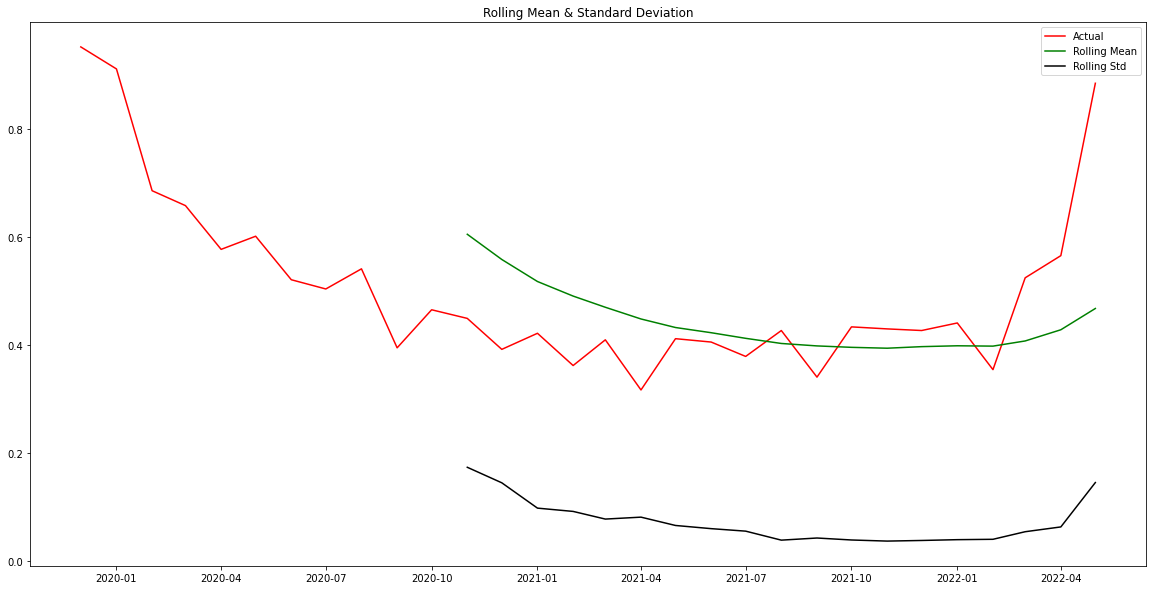

Dickey-Fuller Test: 
Test Statistic           2.323165
p-value                  0.998969
Lags Used                7.000000
No. of Obs              22.000000
Critical Value (1%)     -3.769733
Critical Value (5%)     -3.005426
Critical Value (10%)    -2.642501
dtype: float64


In [ ]:
# panggil function dan terapkan pada data_log_diff
stationarity(data_log_diff)

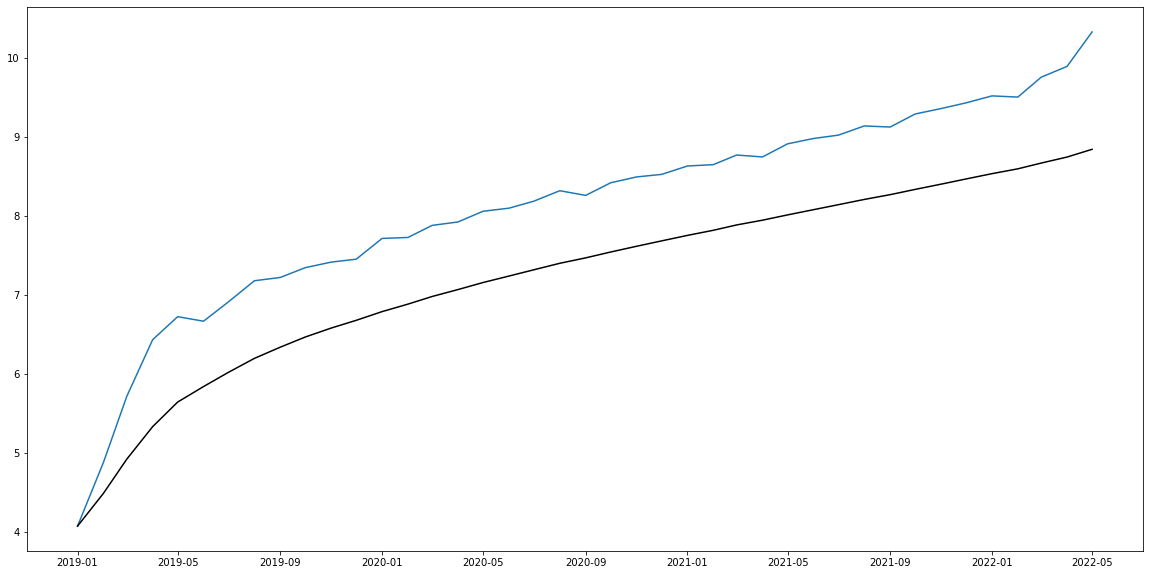

In [ ]:
# Visualisasikan ke dalam bentuk chart 
plt.figure(figsize=(20,10))

# Terapkan function ewm pada data_log melalui variable exp_data
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean() 

plt.plot(data_log)
plt.plot(exp_data, color='black')

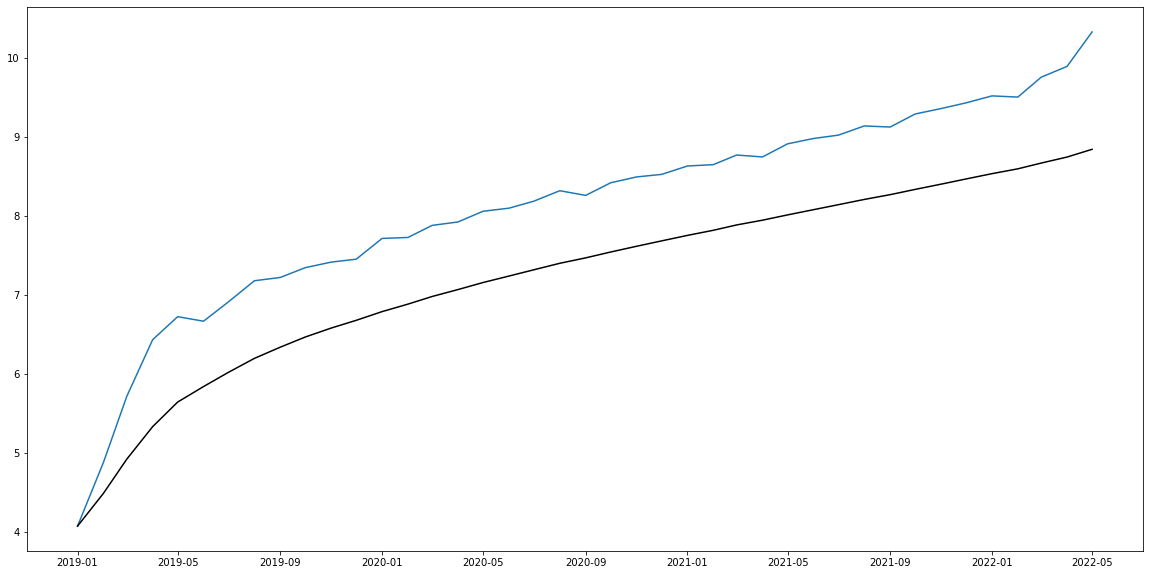

In [ ]:
# Visualisasikan ke dalam bentuk chart 
plt.figure(figsize=(20,10))

# Terapkan function ewm pada data_log melalui variable exp_data
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean() 

plt.plot(data_log)
plt.plot(exp_data, color='black')

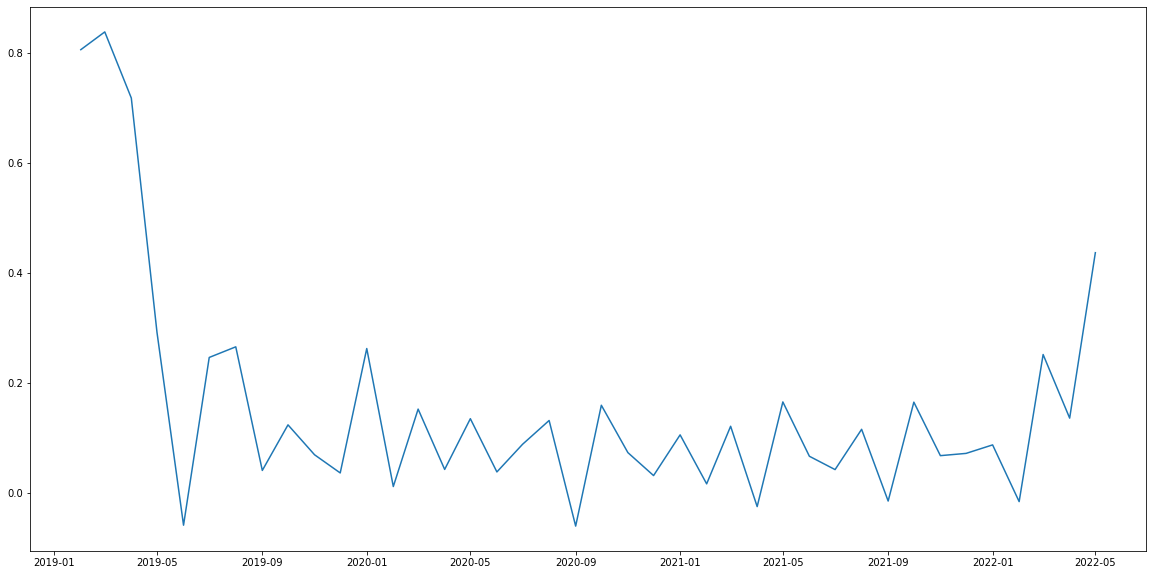

In [ ]:
# Buat format ukuran chart
plt.figure(figsize=(20,10))

# Terapkan shift terhadap data yang telah diterapkan transformasi log di cell sebelumnya
data_shift=data_log-data_log.shift() 

# Tampilkan chart
plt.plot(data_shift)

In [ ]:
# Check missing value
data_shift.isna().sum()

num_of_item    1
dtype: int64

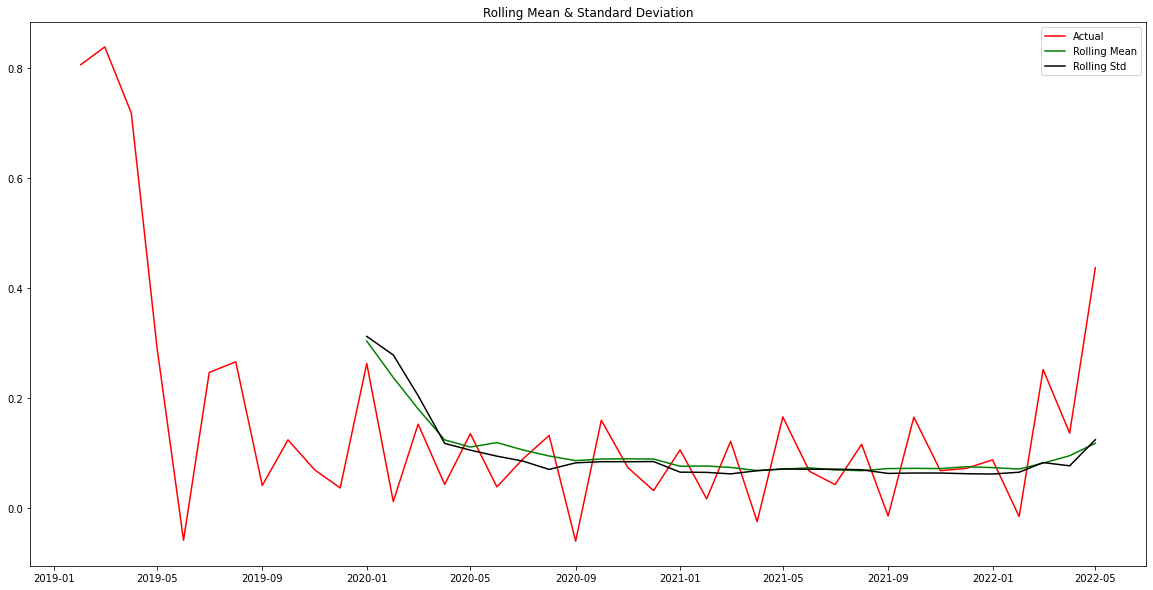

Dickey-Fuller Test: 
Test Statistic          -2.410733
p-value                  0.138730
Lags Used                4.000000
No. of Obs              35.000000
Critical Value (1%)     -3.632743
Critical Value (5%)     -2.948510
Critical Value (10%)    -2.613017
dtype: float64


In [ ]:
# Lakukan dropna 
data_shift=data_shift.dropna()

# Panggil function stationarity dan terapkan pada data_shift yang sudah dibersihkan dari NA value
stationarity(data_shift)

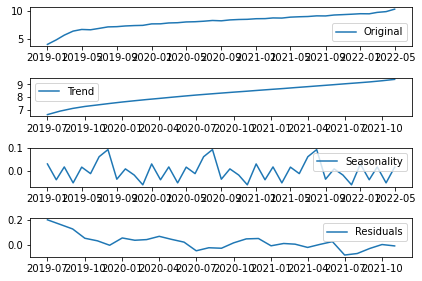

In [ ]:
# panggil function seasonal_decompose () dari statsmodels.tsa yang diterapkan di variabel data_log
decomp=seasonal_decompose(data_log)

# buat variabel trend, seasonal, residual yang sudah diterapkan
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

# Format gambar 
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
# Tampilkan nilai dari tiap kategori dari 24 baris teratas
print("Trend \n",trend.head(24), '\n') # \n untuk menambahkan baris di akhir
print("Seasonal \n",seasonal.head(24), '\n')
print("Residual \n",residual.head(24), '\n')

Trend 
               num_of_item
created_at_x             
2019-01-01            NaN
2019-02-01            NaN
2019-03-01            NaN
2019-04-01            NaN
2019-05-01            NaN
2019-06-01            NaN
2019-07-01       6.658330
2019-08-01       6.928869
2019-09-01       7.137844
2019-10-01       7.290209
2019-11-01       7.407967
2019-12-01       7.523228
2020-01-01       7.635951
2020-02-01       7.736537
2020-03-01       7.827344
2020-04-01       7.915426
2020-05-01       8.005152
2020-06-01       8.094841
2020-07-01       8.177802
2020-08-01       8.254437
2020-09-01       8.329978
2020-10-01       8.401410
2020-11-01       8.471299
2020-12-01       8.543641 

Seasonal 
               num_of_item
created_at_x             
2019-01-01       0.029954
2019-02-01      -0.040067
2019-03-01       0.016732
2019-04-01      -0.053814
2019-05-01       0.015851
2019-06-01      -0.012829
2019-07-01       0.061897
2019-08-01       0.093424
2019-09-01      -0.037600
2019-10-01       

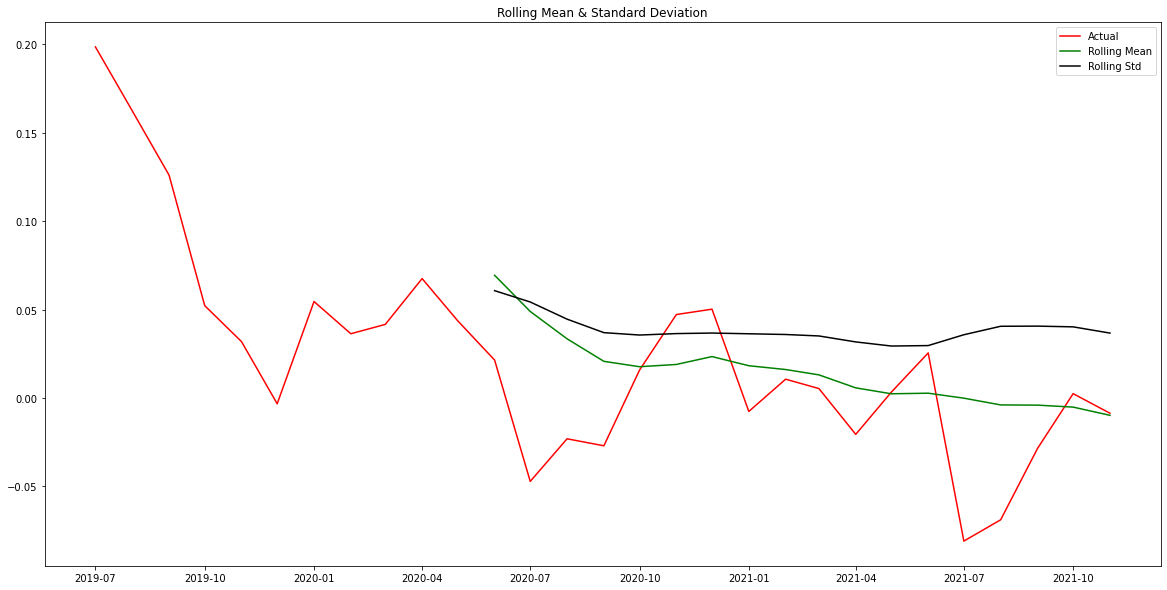

Dickey-Fuller Test: 
Test Statistic          -3.367713
p-value                  0.012110
Lags Used                0.000000
No. of Obs              28.000000
Critical Value (1%)     -3.688926
Critical Value (5%)     -2.971989
Critical Value (10%)    -2.625296
dtype: float64


In [ ]:
# assign variable baru decomp_data dengan variabel residual di atas
decomp_data=residual

# terapkan function dropna
decomp_data=decomp_data.dropna()

# Panggil function stationarity dan terapkan pada decomp data yang tanpa NA value
stationarity(decomp_data)

Text(0.5, 1.0, 'Partial Autocorrelation Function / PACF')

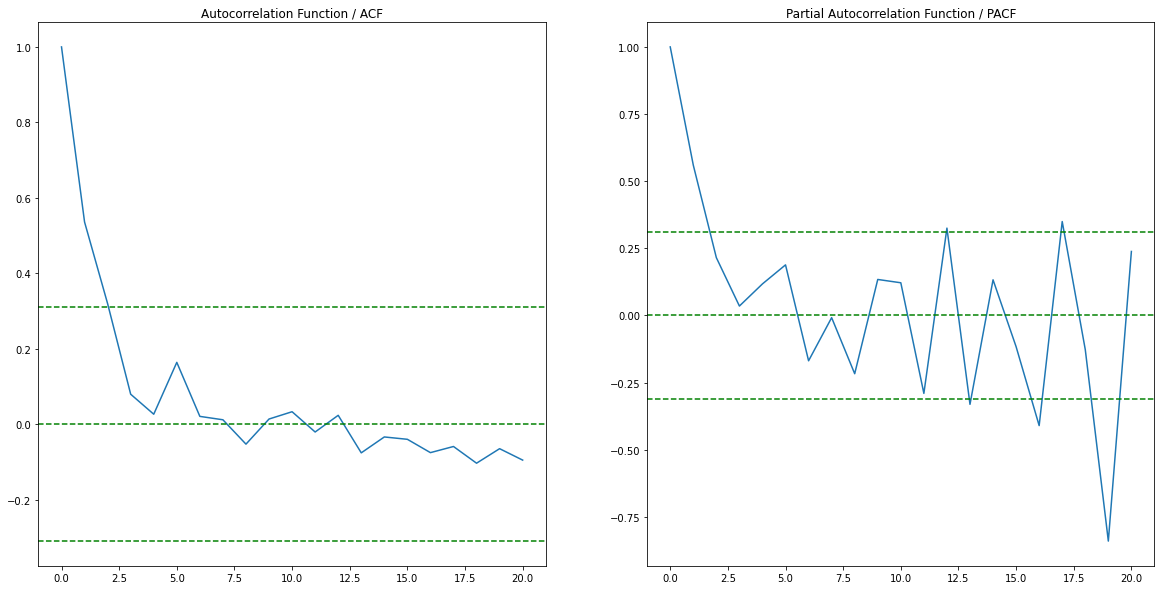

In [ ]:
# dari module time series analysis, import function acf dan pacf
# ACF = Auto Correlation Function
# PACF = Partial Auto Correlation Function
from statsmodels.tsa.stattools import acf, pacf 

# terapkan function acf dan pcf pada data_shift yang sudah dibuat
lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

# Format grafik dan visualisasikan ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

# Format grafik dan visualisasikan PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

In [ ]:
# Split the data untuk 29 month test
train = item[0:int(len(item)*0.80)]   #train data sebesar 80%
test = item[int(len(item)*0.80):]     #test data sebesar 20%

In [ ]:
model_data = ExponentialSmoothing(np.asarray(train['num_of_item']),seasonal_periods=12, trend='add',seasonal='mul').fit(optimized=True)

In [ ]:
#copy 29 bulan periode (1958-01 - 1960-12) untuk test dan assign ke data_Holt
data_Holt = test.copy()

In [ ]:
data_Holt['Holt'] = model_data.forecast(len(test['num_of_item']))

In [ ]:
data_Holt.tail()

,num_of_item,Holt
created_at_x,,
2022-01-01,13706,9941.355901
2022-02-01,13502,9419.802032
2022-03-01,17371,10207.800283
2022-04-01,19912,9591.332855
2022-05-01,30819,10915.647287


In [ ]:
#params untuk mengubah data pada variabel model_data menjadi sebuah dictionary
model_data.params

{'damping_slope': nan,
 'initial_level': 2651.0,
 'initial_seasons': array([0.02225575, 0.04979253, 0.11505092, 0.23576009, 0.31572991,
        0.29800075, 0.38136552, 0.4975481 , 0.5186722 , 0.58732554,
        0.62995096, 0.65371558]),
 'initial_slope': 216.77083333333334,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.05263157894736842,
 'smoothing_seasonal': 0.894736842105263,
 'smoothing_slope': 0.05263157894736842,
 'use_boxcox': False}

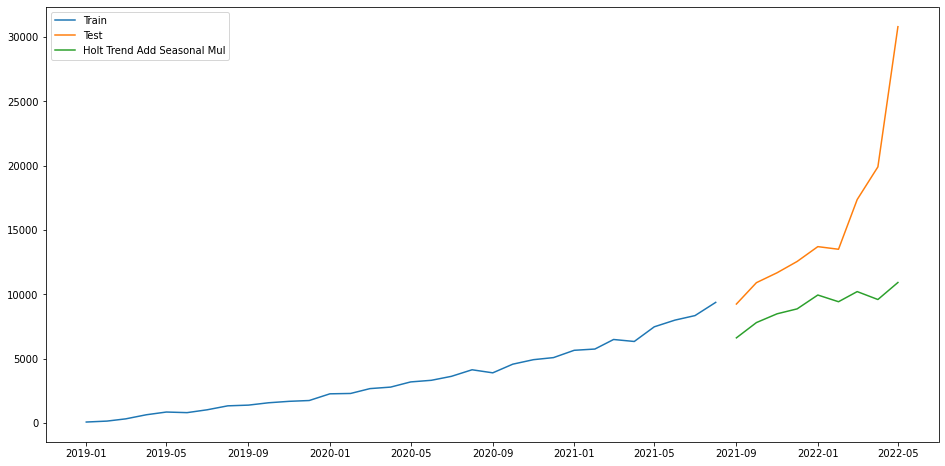

In [ ]:
# visualisasi hasil forecast dari model HoltWinters dengan data aktual
plt.figure(figsize=(16,8))
plt.plot(train['num_of_item'], label='Train')
plt.plot(test['num_of_item'], label='Test')
plt.plot(data_Holt['Holt'], label='Holt Trend Add Seasonal Mul')
plt.legend(loc=0)

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in list(itertools.product(p, d, q))]

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
train_log = np.log10(train['num_of_item'])

In [ ]:
for param in pdq: #Non-Seasonal
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_log,
                                             order = param,
                                             seasonal_order = param_seasonal)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal #Store the best param values : AIC, P, D, Q [Non-S / Seas]
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(0, 0, 0, 10)12 model - AIC:-70.25337166592419


In [ ]:
# tampilkan hasil dari SARIMAX
mod = sm.tsa.statespace.SARIMAX(train_log,
                                order=(0,1,1),
                                seasonal_order=(1,0,1,10),
                                enforce_stationarity=True)

best_results = mod.fit()

print(best_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6741      0.229      2.938      0.003       0.224       1.124
ar.S.L10       0.7794      1.188      0.656      0.512      -1.550       3.108
ma.S.L10      -0.5668      1.526     -0.371      0.710      -3.558       2.424
sigma2         0.0074      0.003      2.878      0.004       0.002       0.012


In [ ]:
# Terapkan function get_prediction() pada best_results
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2050-01-01'), dynamic=True, full_results=True)
pred_dynamic

In [ ]:
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci 

,lower num_of_item,upper num_of_item
2050-01-01,-4.589028,14.624214


In [ ]:
pred99 = best_results.get_forecast(steps=29, alpha=0.1)
pred99

In [ ]:
# Extract the predicted and true values of our time series
# sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['item_Forecast'] = np.power(10, pred99.predicted_mean)

In [ ]:
testCopy.tail(10)

,num_of_item,item_Forecast
created_at_x,,
2021-09-01,9239,10157.681841
2021-10-01,10902,10877.728733
2021-11-01,11674,11635.313480
2021-12-01,12552,11688.492982
2022-01-01,13706,12469.707842
2022-02-01,13502,12746.614632
2022-03-01,17371,13416.536702
2022-04-01,19912,13994.555586
2022-05-01,30819,14317.034985


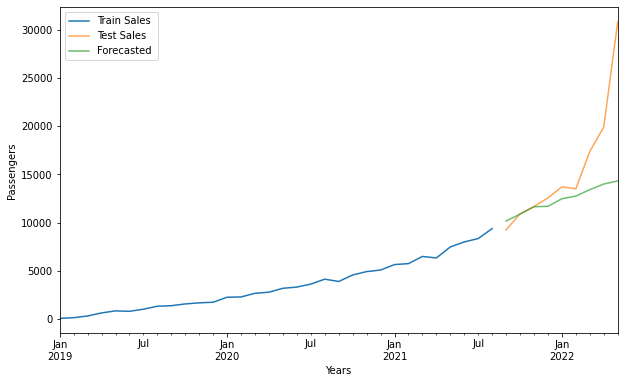

In [ ]:
# visualisasikan dari antara train, test, dan hasil forecast

axis = train['num_of_item'].plot(label='Train Sales', figsize=(10, 6))
testCopy['num_of_item'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['item_Forecast'].plot(ax=axis, label='Forecasted ', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Passengers')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
n_steps = 36
idx = pd.date_range(data.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2022-05-01,10157.681841,6891.941612,14970.890090,6891.941612,14970.890090
2022-06-01,10877.728733,5106.887585,23169.686119,5106.887585,23169.686119
2022-07-01,11635.313480,4295.408990,31517.492304,4295.408990,31517.492304
2022-08-01,11688.492982,3558.597493,38391.773293,3558.597493,38391.773293
2022-09-01,12469.707842,3217.070489,48333.915661,3217.070489,48333.915661


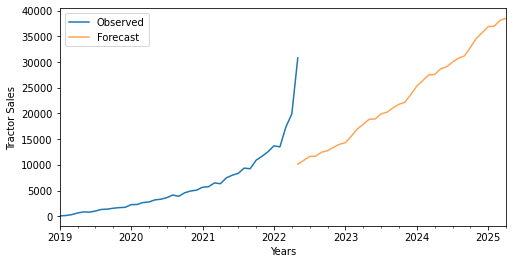

In [ ]:
# plot the forecast along with the confidence band
axis = item['num_of_item'].plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
# axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

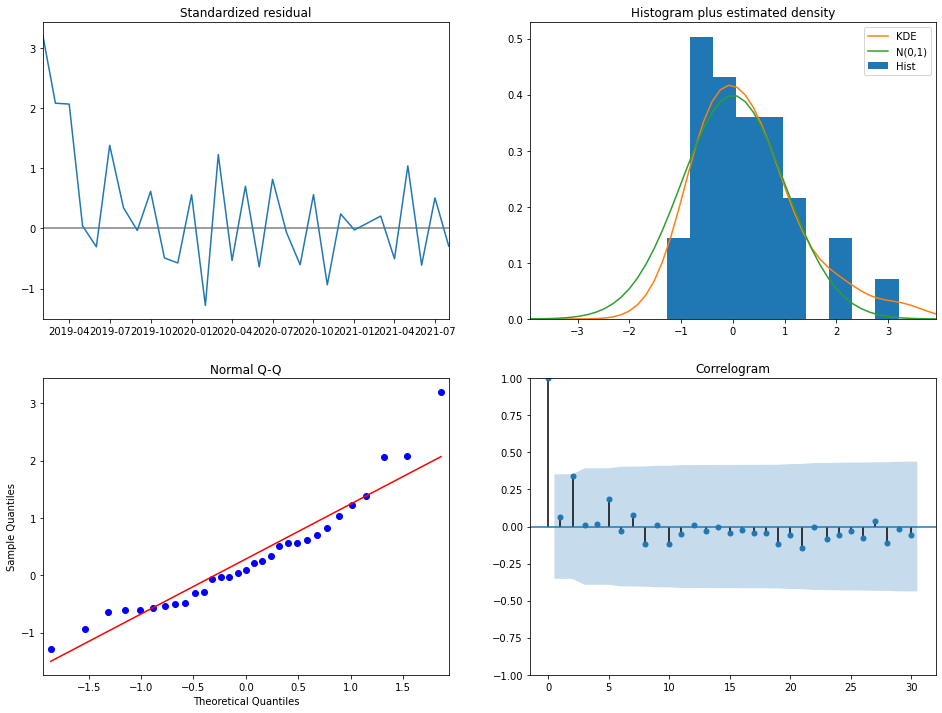

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [ ]:
# Hitung MAE pada model HoltWinters menggunakan function yang dibuat dari awal
def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 

# Hitung MAPE pada model HoltWinters
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MSE dan RMSE pada model HoltWinters
mse = ((test['num_of_item'] - data_Holt['Holt']) ** 2).mean()
rmse = np.sqrt(mse)

print('Mean Absolute Error of our forecasts is ', mean_absolute_error(test['num_of_item'],data_Holt['Holt']).round(3))
print('Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(test['num_of_item'],data_Holt['Holt']).round(2), ' %')
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 3)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

Mean Absolute Error of our forecasts is  6427.953
Mean Absolute Percentage Error of our forecasts is  36.56  %
The Mean Squared Error of our forecasts is 69463557.613
The Root Mean Squared Error of our forecasts is 8334.48


In [ ]:
# Import module metrics dan panggil functionnya
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = test['num_of_item']
y_pred = testCopy['item_Forecast']

print('The Mean Absolute Error of our forecasts is ', mean_absolute_error(y_true, y_pred).round(3))
print ('The Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(y_true, y_pred).round(3), '%')
print ('The Mean Squared Error of our forecasts is ', mean_squared_error(y_true, y_pred).round(3))
print ('The Root Mean Squared Error of our forecasts is ', np.sqrt(mean_squared_error(y_true, y_pred)).round(3))

The Mean Absolute Error of our forecasts is  3356.744
The Mean Absolute Percentage Error of our forecasts is  0.153 %
The Mean Squared Error of our forecasts is  36295501.056
The Root Mean Squared Error of our forecasts is  6024.575


# VISUALISASI DATA

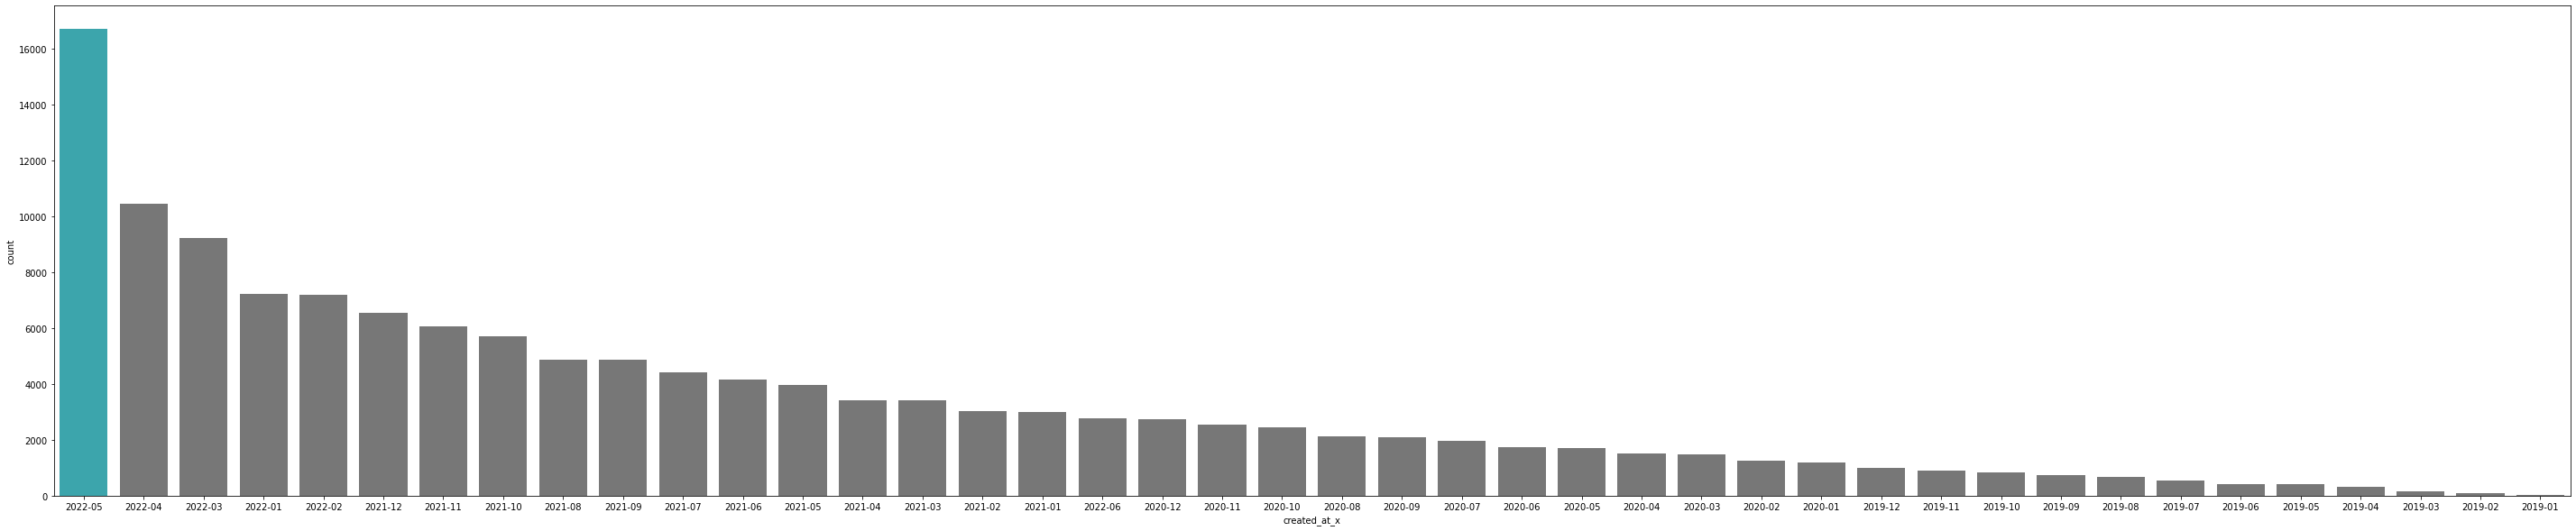

In [ ]:
df3['created_at_x'] = pd.to_datetime(df3['created_at_x'], format="%Y-%m-%d %H:%M:%S")
tsy=df3.created_at_x.dt.to_period('M').value_counts().index
tsx=df3.created_at_x.dt.to_period('M')
plt.figure(figsize=(50, 10))
sns.countplot(
    x=tsx,
    data=df3,
    order=tsy,
    palette=["#29B5BF"] + (len(tsy)-1)*["#777777"]
)
plt.grid(False)
plt.show()

In [ ]:
df3['yyyy'] = pd.to_datetime(df3['created_at_x']).dt.year
df3['yyyy'].astype(str)
dff = df3[df3["yyyy"] == 2020]
dff

,id_x,order_id,user_id,product_id,inventory_item_id,status,created_at_x,shipped_at,delivered_at,returned_at,...,brand,retail_price,department,sku,distribution_center_id,gender,created_at_y,num_of_item,profit,yyyy
0,59347,41038,33153,13606,160256,Shipped,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,...,Scarf_tradinginc,2.500000,Women,4ACBEDBE977480D19B7B682D4878CAE2,3,F,2020-01-05 08:18:00+00:00,1,1.392500,2020
9,92885,64352,51709,13606,250897,Processing,2020-05-02 08:22:09+00:00,NaN,NaN,NaN,...,Scarf_tradinginc,2.500000,Women,4ACBEDBE977480D19B7B682D4878CAE2,3,F,2020-05-02 10:37:00+00:00,1,1.392500,2020
51,83662,57959,46656,15917,226059,Complete,2020-08-05 14:11:03+00:00,2020-08-05 09:24:00+00:00,2020-08-08 06:01:00+00:00,NaN,...,Keds,3.500000,Women,7737A2600285AFE739FC99B6F0E9FD97,1,F,2020-08-02 17:21:00+00:00,4,1.862000,2020
52,83661,57959,46656,2591,226057,Complete,2020-08-06 17:30:58+00:00,2020-08-05 09:24:00+00:00,2020-08-08 06:01:00+00:00,NaN,...,Hanes,16.879999,Women,978FCE5BCC4ECCC88AD48CE3914124A2,3,F,2020-08-02 17:21:00+00:00,4,10.482479,2020
53,83663,57959,46656,14600,226062,Complete,2020-08-05 15:20:08+00:00,2020-08-05 09:24:00+00:00,2020-08-08 06:01:00+00:00,NaN,...,Motherhood Maternity,36.980000,Women,7AB8464DF372307C1BCCE9B2A043415A,3,F,2020-08-02 17:21:00+00:00,4,20.265040,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180446,59949,41454,33471,28895,161906,Processing,2020-12-03 06:49:00+00:00,NaN,NaN,NaN,...,Nautica,23.860001,Men,DE7E76952411D036CA4B58FFCF37BFE7,8,M,2020-12-03 09:39:00+00:00,1,14.196700,2020
180455,114943,79505,63768,24190,310327,Complete,2020-05-10 07:29:30+00:00,2020-05-12 22:36:00+00:00,2020-05-15 08:41:00+00:00,NaN,...,Allegra K,30.860001,Men,CE4A5CD2D961AC2C758C43C3C2B72CAA,9,M,2020-05-10 08:42:00+00:00,1,16.448380,2020
180482,145090,100272,80439,6140,391760,Shipped,2020-11-25 11:40:45+00:00,2020-11-26 12:31:00+00:00,NaN,NaN,...,Allegra K,7.160000,Women,3D7D9461075EB7C37FBBFCAD1D7042C1,9,F,2020-11-25 13:01:00+00:00,1,2.792400,2020
180484,30044,20820,16898,13930,81074,Shipped,2020-11-18 12:03:21+00:00,2020-11-20 01:32:00+00:00,NaN,NaN,...,Allegra K,7.910000,Women,3DCC0806127AC6878B990A079E4F8C77,9,F,2020-11-18 12:11:00+00:00,1,5.094040,2020


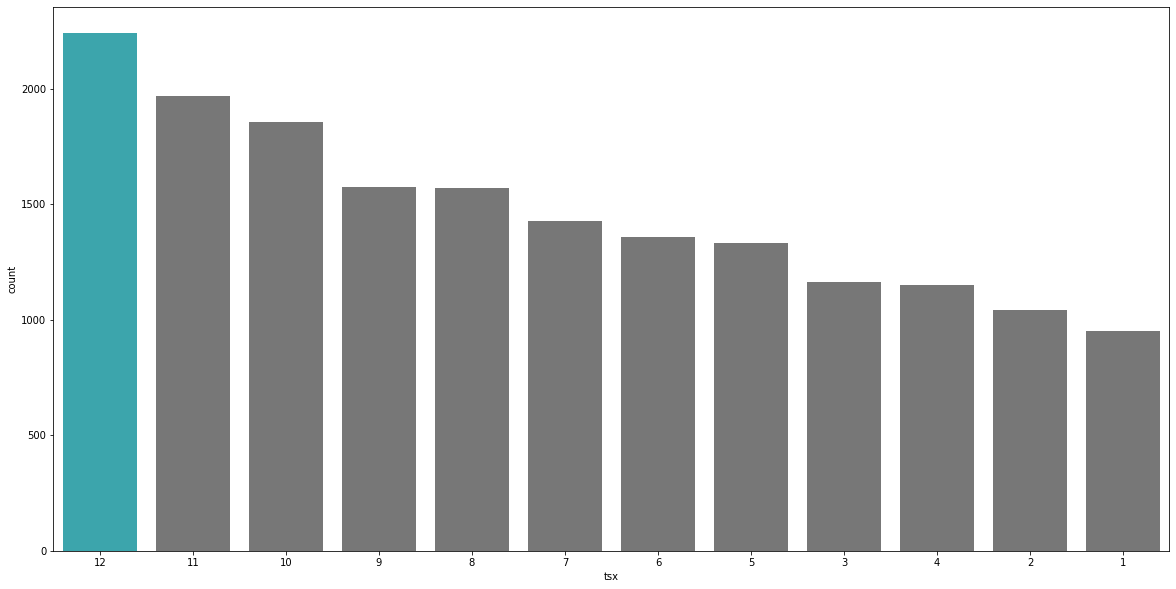

In [ ]:
dff = df3.copy()
dff["yyyy"] = pd.to_datetime(dff['delivered_at']).dt.year
dff["yyyy"].astype(str)
dff = dff[dff["yyyy"] == 2021]
dff["tsx"] = pd.to_datetime(dff['delivered_at']).dt.month
tsy = dff.tsx.value_counts().index
plt.figure(figsize=(20, 10))
sns.countplot(
    x="tsx",
    data=dff,
    order=tsy,
    palette=["#29B5BF"] + (len(tsy)-1)*["#777777"]
)
plt.grid(False)
plt.show()